In [2]:
import sys
sys.path.append('/home/painchess/projects_clean/Simulations')
sys.path.append('/home/painchess/projects_clean/Halo_Analytical_Calculations')
import cosmo_parameters as cp
import simulation as sm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.neighbors import KernelDensity

params = {'legend.fontsize': 7,
          'legend.handlelength': 2}
mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['font.family'] = 'serif'
plt.rcParams.update(params)

## SIMULATIONS LIST AND FOLDER

(0.6, 1.05)

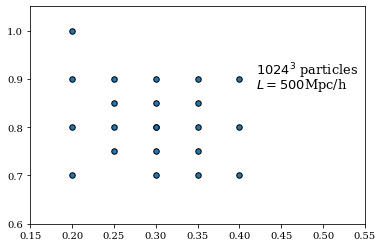

In [3]:
old_path = '/home/painchess/disq2/ahf-v1.0-101/'
path = '/home/painchess/sims/'

sim_names = ['M25S07', 'M25S08', 'M25S09', 'M03S07','M03S08', 'M03S09', 'M35S07', 'M35S08', 'M35S09',
             'Illustris', 'bolshoiP', 'bolshoiW', 'M03S08b', 'm25s85', 'm2s8', 'm4s7', 'm4s8', 'm2s9',
             'm3s8_50', 'm3s8', 'm35s75', 'm4s9', 'm3s9', 'm25s75', 'm2s1', 'm3s7', 'm3s85', 'm2s7', 'm25s8', 'm35s8', 'm25s9', 'm35s85', 'm3s75', 'm35s9', 'm35s7']
omegas = [0.25, 0.25, 0.25, 0.3, 0.3, 0.3, 0.35, 0.35, 0.35, 0.309, 0.307, 0.27, 0.3, 0.25, 0.2, 0.4, 0.4, 0.2,  0.3
          ,0.3, 0.35, 0.4, 0.3, 0.25, 0.2, 0.3, 0.3, 0.2, 0.25, 0.35, 0.25, 0.35, 0.3, 0.35, 0.35]
sigmas = [0.7, 0.8, 0.9, 0.7, 0.8, 0.9, 0.7, 0.8, 0.9, 0.816, 0.82, 0.82, 0.8, 0.85, 0.8, 0.7, 0.8, 0.9, 0.8
          ,0.8, 0.75, 0.9, 0.9, 0.75, 1.0, 0.7, 0.85, 0.7, 0.8, 0.8, 0.9, 0.85, 0.75, 0.9, 0.7]
sims = dict(zip(sim_names, list(zip(omegas, sigmas))))
plt.scatter(omegas[13:], sigmas[13:], edgecolors='k', s=30)

plt.annotate(r'$1024^3$ particles', (0.42, 0.91), fontsize=13)
plt.annotate(r'$L=500$Mpc/h', (0.42, 0.88), fontsize=13)

plt.xlim(0.15, 0.55)
plt.ylim(0.6, 1.05)

# Density distribution

In [4]:
s = -1
sim1 = sm.Simulation(sim_names[s], omegas[s], sigmas[s], path)
halos = sim1.read_halos()
halos.keys()

Index(['#ID(1)', 'hostHalo(2)', 'numSubStruct(3)', 'Mhalo(4)', 'npart(5)',
       'Xc(6)', 'Yc(7)', 'Zc(8)', 'VXc(9)', 'VYc(10)', 'VZc(11)', 'Rhalo(12)',
       'Rmax(13)', 'r2(14)', 'mbp_offset(15)', 'com_offset(16)', 'Vmax(17)',
       'v_esc(18)', 'sigV(19)', 'lambda(20)', 'lambdaE(21)', 'Lx(22)',
       'Ly(23)', 'Lz(24)', 'b(25)', 'c(26)', 'Eax(27)', 'Eay(28)', 'Eaz(29)',
       'Ebx(30)', 'Eby(31)', 'Ebz(32)', 'Ecx(33)', 'Ecy(34)', 'Ecz(35)',
       'ovdens(36)', 'nbins(37)', 'fMhires(38)', 'Ekin(39)', 'Epot(40)',
       'SurfP(41)', 'Phi0(42)', 'cNFW(43)'],
      dtype='object')

## ALONG THE BANANA

-10
-5
-6
-12
-1


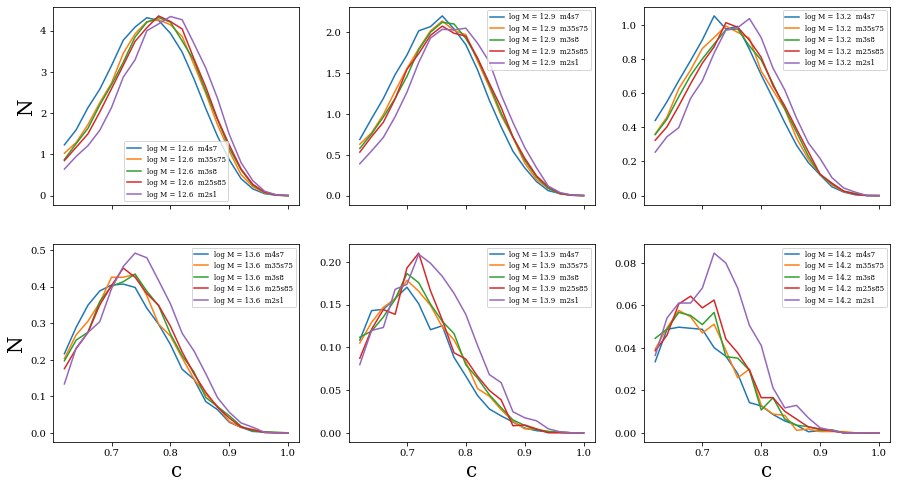

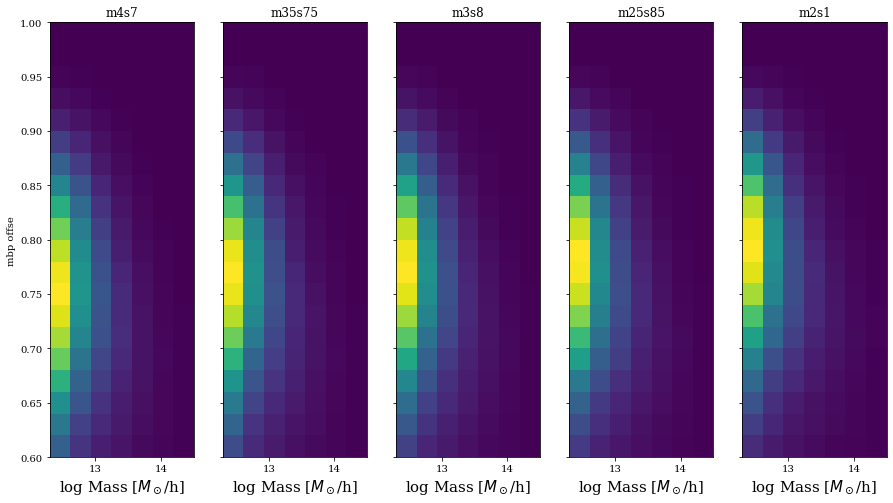

In [12]:
simselec = [-10, -5, -6, -12, -1]
nsims, nbins_m, nbins_c = len(simselec), 20, 7
prop = 'c(26)'

fig, axs = plt.subplots(2, 3, sharex=True, figsize=[15, 8])
fig2, axs2 = plt.subplots(1, nsims, sharey=True, figsize=[15, 8])
tosave = np.zeros((2,3,nsims,2,nbins_m))

colormaps = ['Greys', 'YlOrBr', 'Wistia']

for i, s in zip(range(nsims), simselec):
    print(s)
    sim1 = sm.Simulation(sim_names[s], omegas[s], sigmas[s], path)
    halos = sim1.read_halos(snapshot=0)
    reds = sim1.get_redshifts()
    masses = halos['Mhalo(4)']
    str_prop = halos[prop]
    min_r, max_r = np.mean(str_prop) - 2*np.std(str_prop), np.mean(str_prop) + 2*np.std(str_prop)
    #h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), conc, cmap = cmp, range=[[np.log10(3*np.min(masses)), 14], [2.3, 14]], bins=80)
    h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), str_prop, range=[[12.3, 14.5], [0.6, 1]],density=True, bins=[nbins_c, nbins_m])

    axs2[i].set_title(sim_names[s])

    axs2[i].set_xlabel(r'log Mass [$M_\odot$/h]', size=15)
    axs2[i].set_ylabel('mbp offset'[:9*(i==0)])
    for k in range(1, 7):
        axs[(k-1)//3, (k-1)%3].plot(yedges[1:], h[k, :],  label='log M = {:2.1f}  '.format(xedges[k])+sim_names[s])
        tosave[(k-1)//3, (k-1)%3, i, :, :] = np.array([yedges[1:], h[k, :]])
        if i == nsims-1:
            axs[(k-1)//3, (k-1)%3].legend()
            if (k-1)%3 == 0:
                axs[(k-1)//3, (k-1)%3].set_ylabel('N', size=20)
            if (k-1)//3 == 1:
                axs[(k-1)//3, (k-1)%3].set_xlabel(prop[:-4], size=20)  
fig.savefig('./figs/{}_vs_cosmo_banana.png'.format(prop[:-4]), dpi=650, facecolor='white', transparent=False, bbox_inches='tight')
np.save('./data/{}_vs_cosmo_banana.npy'.format(prop[:-4]), tosave)

## $\Omega_m$ = 0.2

-1
-8
-11


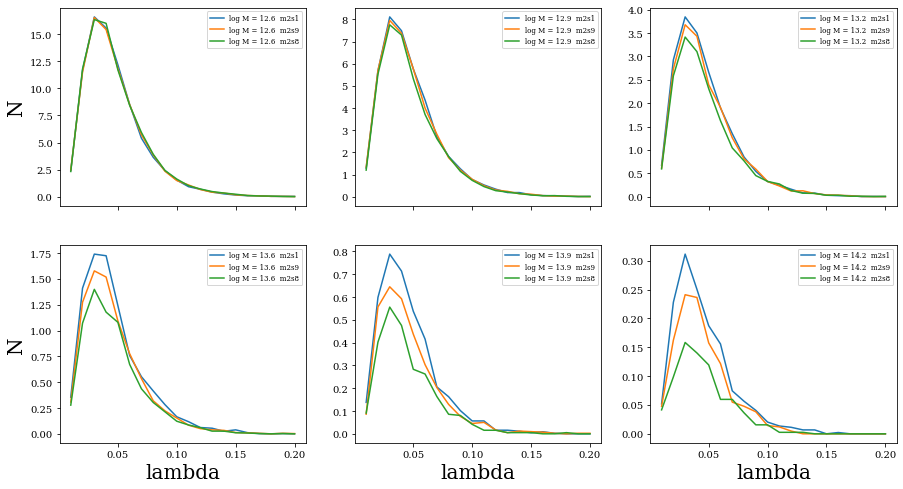

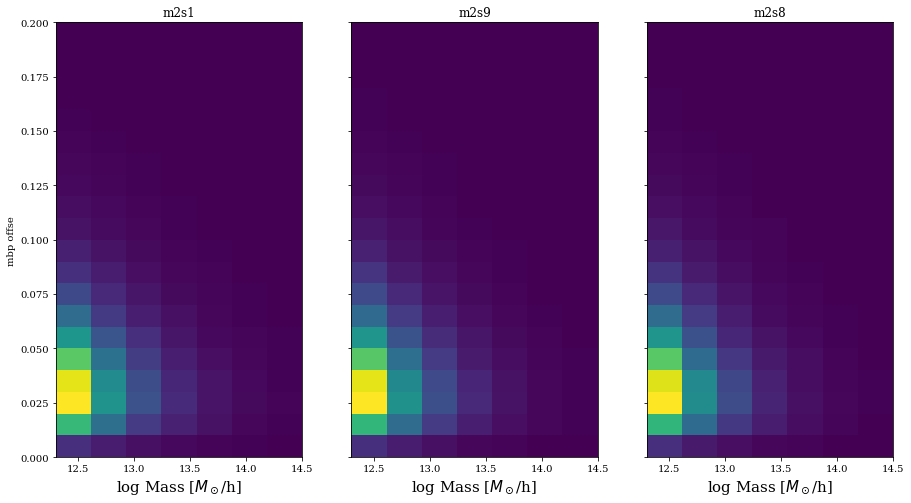

In [19]:
simselec = [-1, -8, -11]
nsims, nbins_m, nbins_c = len(simselec), 20, 7
prop = 'lambda(20)'

fig, axs = plt.subplots(2, 3, sharex=True, figsize=[15, 8])
fig2, axs2 = plt.subplots(1, nsims, sharey=True, figsize=[15, 8])
tosave = np.zeros((2,3,nsims,2,nbins_m))

colormaps = ['Greys', 'YlOrBr', 'Wistia']

for i, s in zip(range(nsims), simselec):
    print(s)
    sim1 = sm.Simulation(sim_names[s], omegas[s], sigmas[s], path)
    halos = sim1.read_halos(snapshot=0)
    reds = sim1.get_redshifts()
    masses = halos['Mhalo(4)']
    str_prop = halos[prop]
    #min_r, max_r = np.mean(str_prop) - 2*np.std(str_prop), np.mean(str_prop) + 2*np.std(str_prop)
    #h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), conc, cmap = cmp, range=[[np.log10(3*np.min(masses)), 14], [2.3, 14]], bins=80)
    h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), str_prop, density=True, range=[[12.3, 14.5], [0, 0.2]], bins=[nbins_c, nbins_m])

    axs2[i].set_title(sim_names[s])

    axs2[i].set_xlabel(r'log Mass [$M_\odot$/h]', size=15)
    axs2[i].set_ylabel('mbp offset'[:9*(i==0)])
    for k in range(1, 7):
        axs[(k-1)//3, (k-1)%3].plot(yedges[1:], h[k, :],  label='log M = {:2.1f}  '.format(xedges[k])+sim_names[s])
        tosave[(k-1)//3, (k-1)%3, i, :, :] = np.array([yedges[1:], h[k, :]])
        if i == nsims-1:
            axs[(k-1)//3, (k-1)%3].legend()
            if (k-1)%3 == 0:
                axs[(k-1)//3, (k-1)%3].set_ylabel('N', size=20)
            if (k-1)//3 == 1:
                axs[(k-1)//3, (k-1)%3].set_xlabel(prop[:-4], size=20)  
# fig.savefig('./figs/{}_vs_cosmo_om2.png'.format(prop[:-4]), dpi=650, facecolor='white', transparent=False, bbox_inches='tight')
# np.save('./data/{}_vs_cosmo_om2.npy'.format(prop[:-4]), tosave)

## $\Omega_m$ = 0.4 

-4
-9
-10


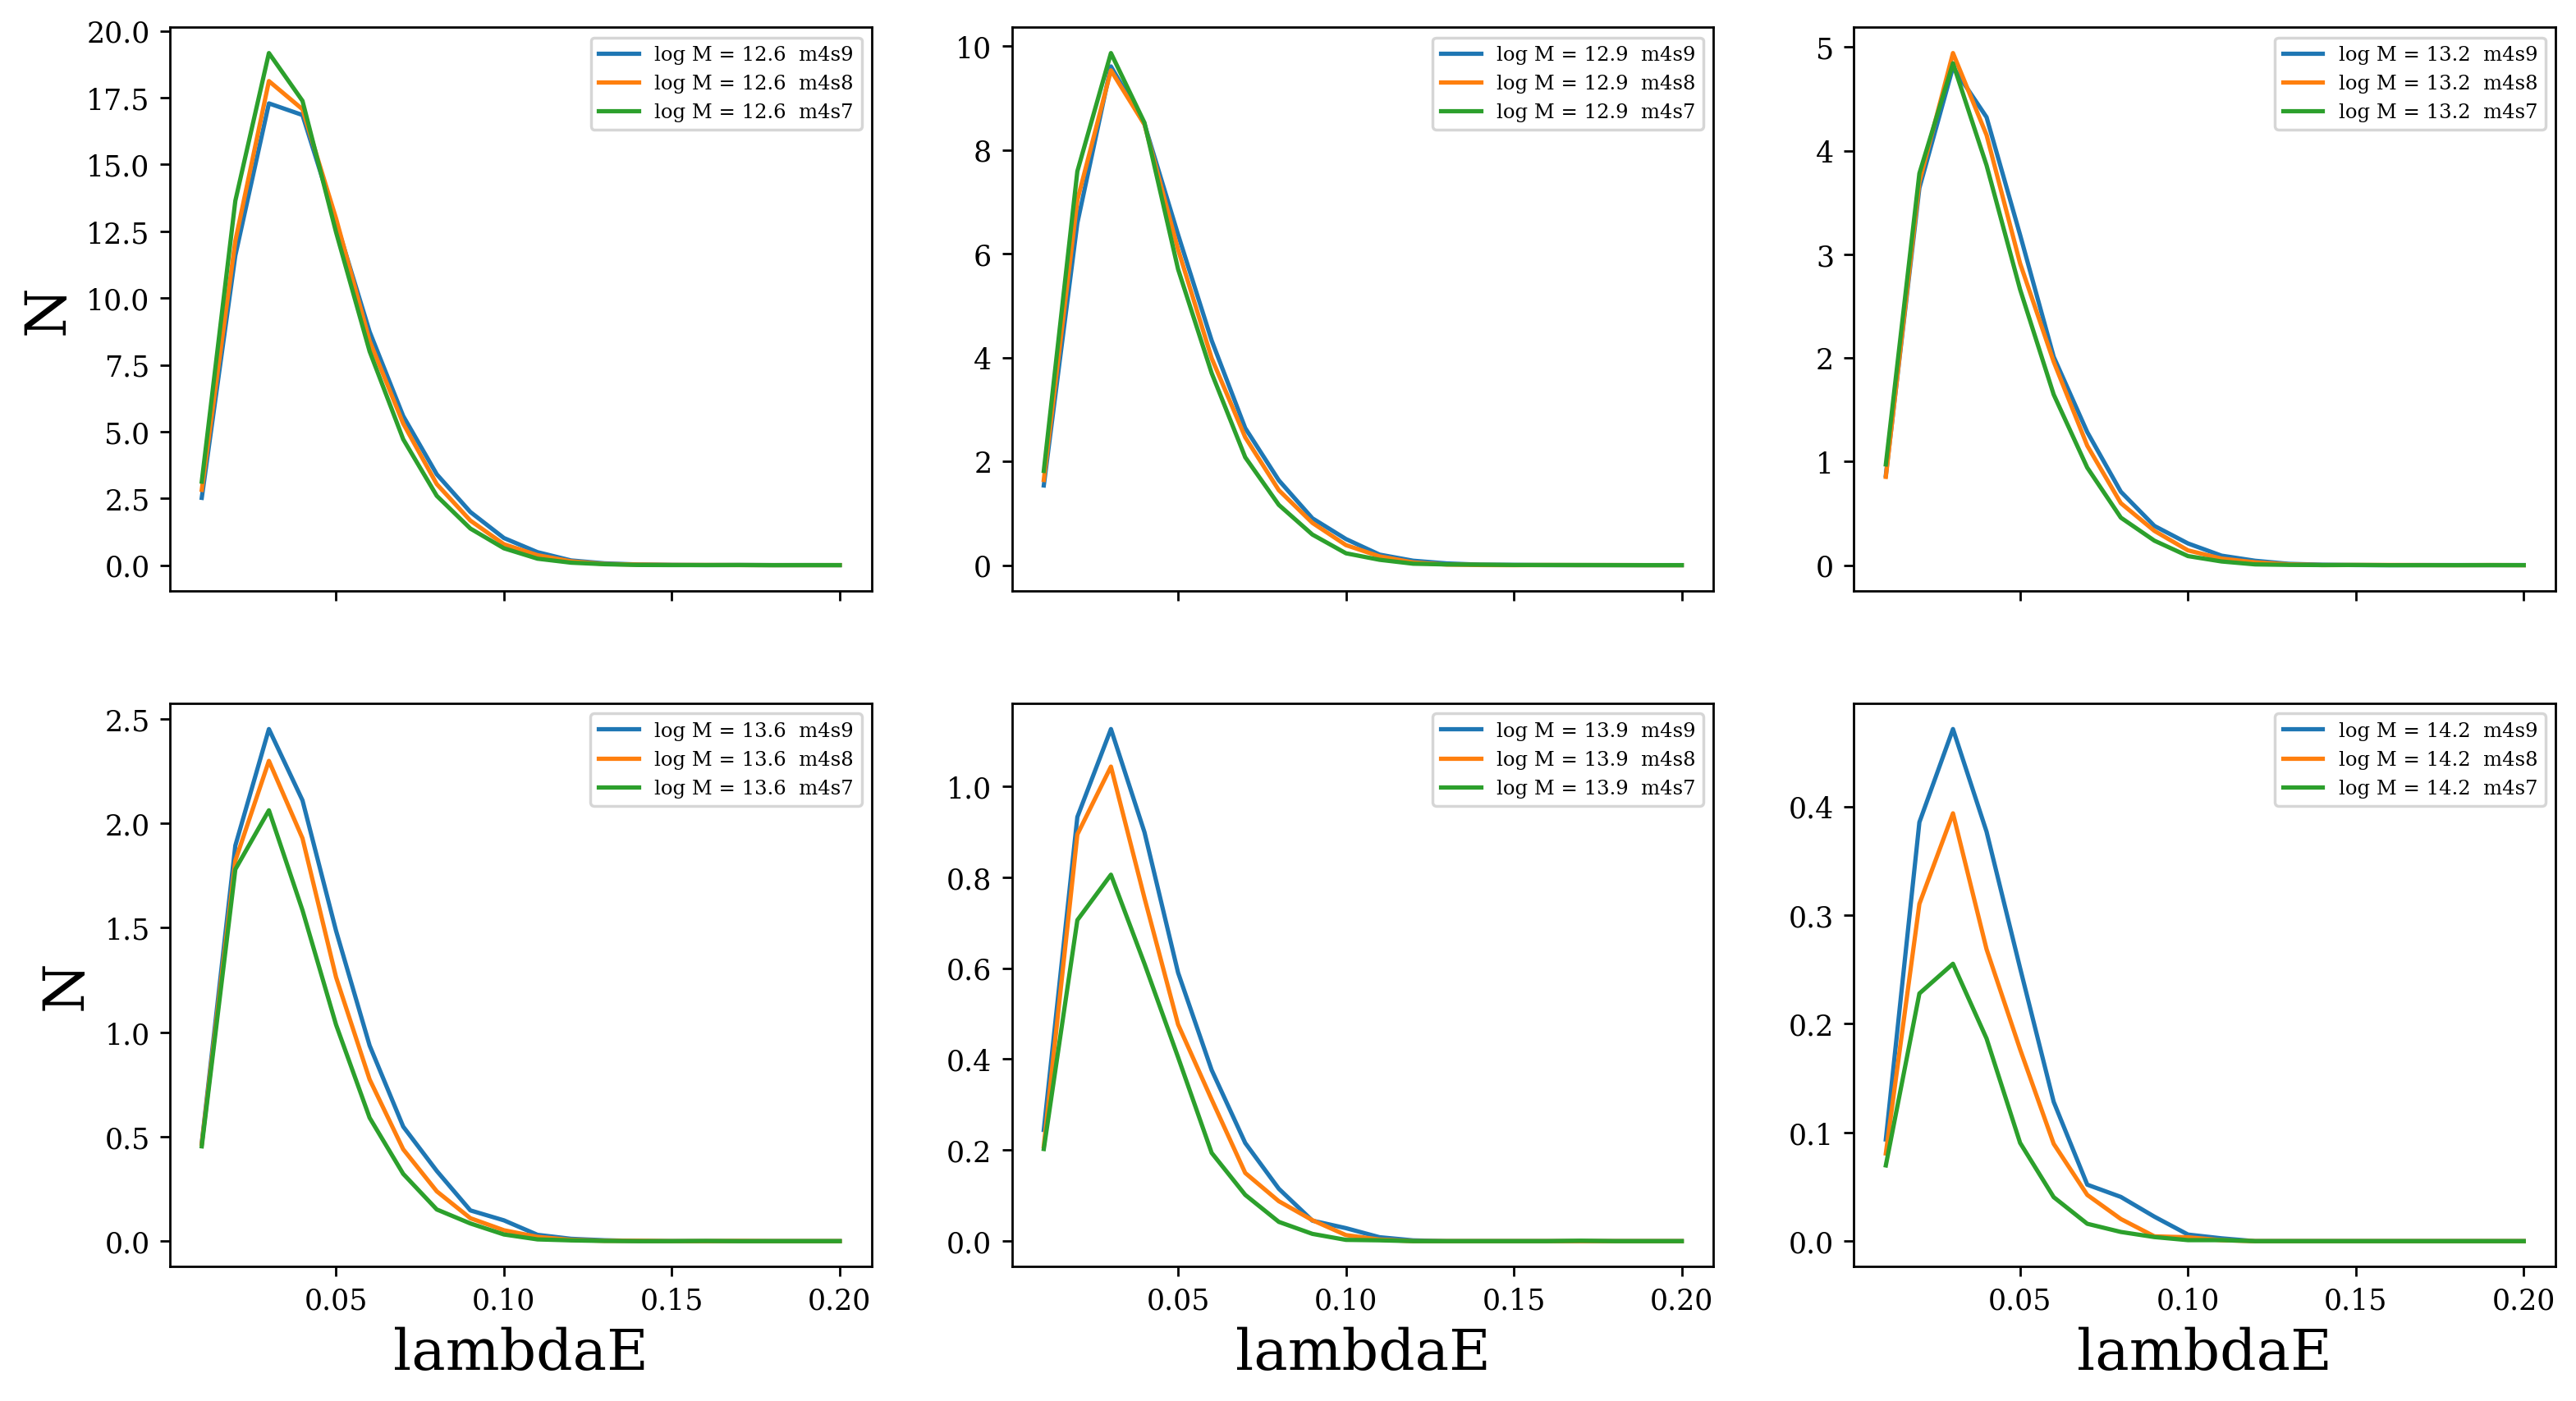

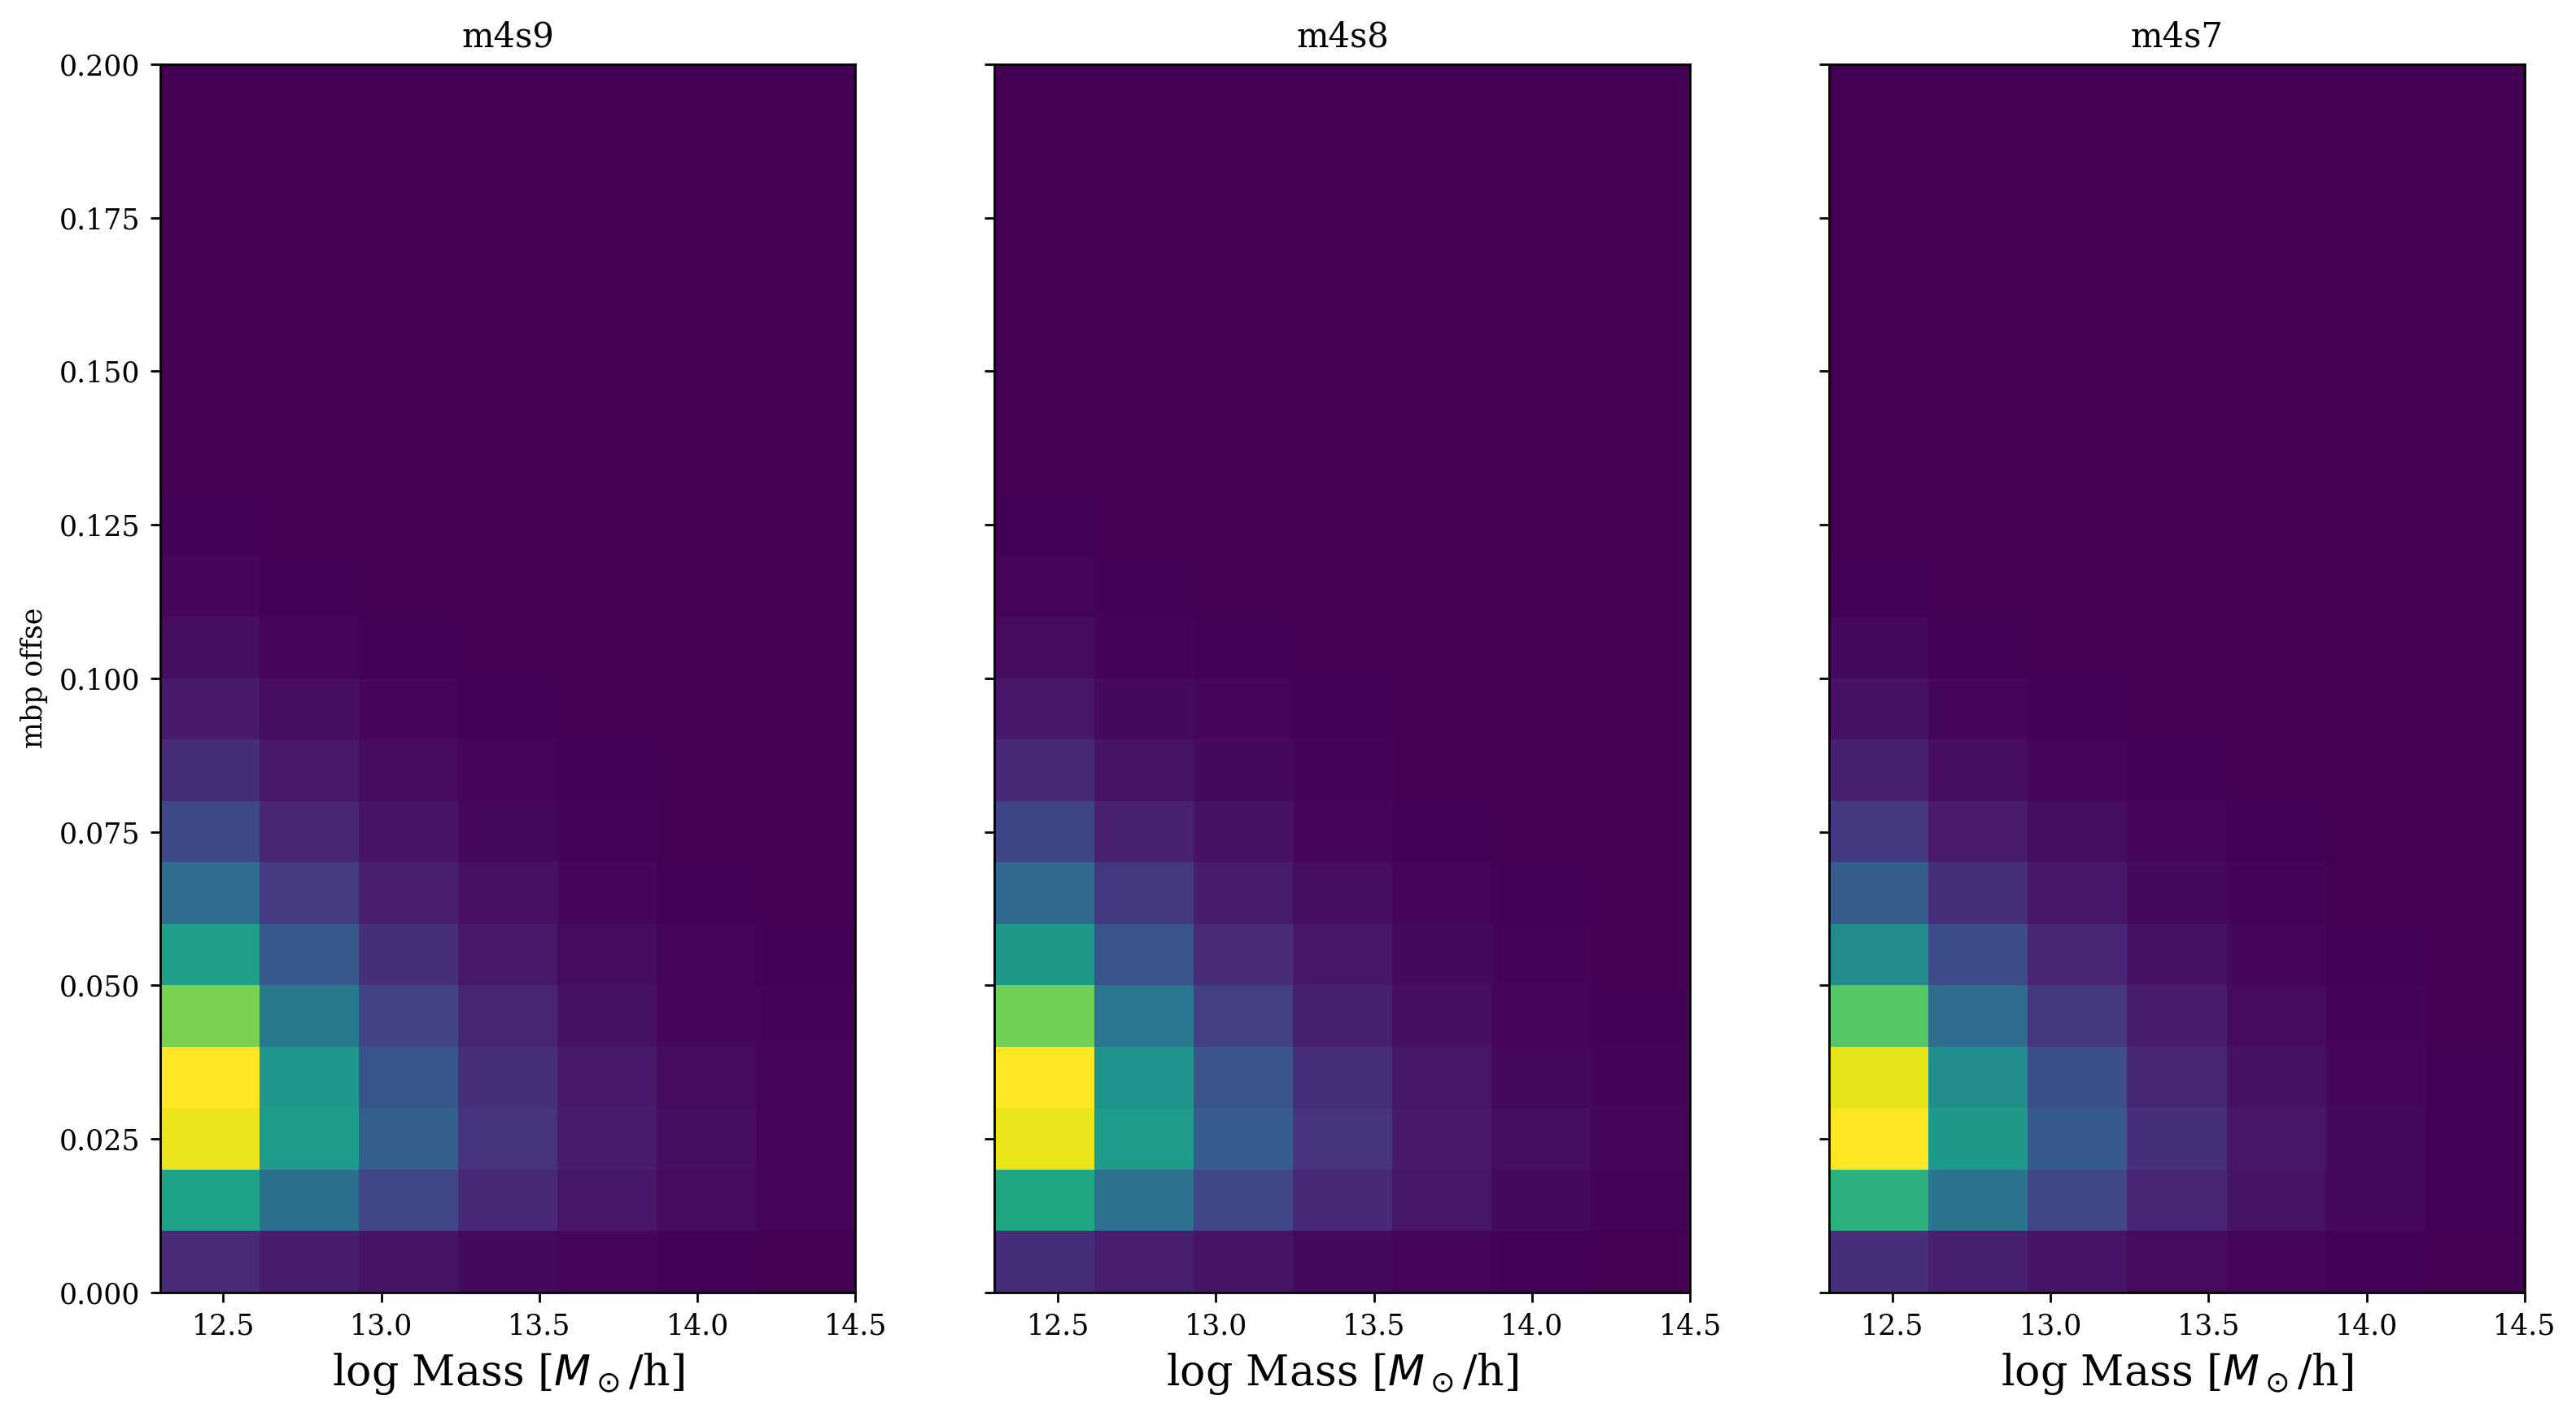

In [24]:
simselec = [-4, -9, -10]
nsims, nbins_m, nbins_c = len(simselec), 20, 7
prop = 'lambdaE(21)'

fig, axs = plt.subplots(2, 3, sharex=True, figsize=[15, 8])
fig2, axs2 = plt.subplots(1, nsims, sharey=True, figsize=[15, 8])
tosave = np.zeros((2,3,nsims,2,nbins_m))

colormaps = ['Greys', 'YlOrBr', 'Wistia']

for i, s in zip(range(nsims), simselec):
    print(s)
    sim1 = sm.Simulation(sim_names[s], omegas[s], sigmas[s], path)
    halos = sim1.read_halos(snapshot=0)
    reds = sim1.get_redshifts()
    masses = halos['Mhalo(4)']
    str_prop = halos[prop]
    #min_r, max_r = np.mean(str_prop) - 2*np.std(str_prop), np.mean(str_prop) + 2*np.std(str_prop)
    #h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), conc, cmap = cmp, range=[[np.log10(3*np.min(masses)), 14], [2.3, 14]], bins=80)
    h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), str_prop, density=True, range=[[12.3, 14.5], [0, 0.2]], bins=[nbins_c, nbins_m])

    axs2[i].set_title(sim_names[s])

    axs2[i].set_xlabel(r'log Mass [$M_\odot$/h]', size=15)
    axs2[i].set_ylabel('mbp offset'[:9*(i==0)])
    for k in range(1, 7):
        axs[(k-1)//3, (k-1)%3].plot(yedges[1:], h[k, :],  label='log M = {:2.1f}  '.format(xedges[k])+sim_names[s])
        tosave[(k-1)//3, (k-1)%3, i, :, :] = np.array([yedges[1:], h[k, :]])
        if i == nsims-1:
            axs[(k-1)//3, (k-1)%3].legend()
            if (k-1)%3 == 0:
                axs[(k-1)//3, (k-1)%3].set_ylabel('N', size=20)
            if (k-1)//3 == 1:
                axs[(k-1)//3, (k-1)%3].set_xlabel(prop[:-4], size=20)  
# fig.savefig('./figs/{}_vs_om4_banana.png'.format(prop[:-4]), dpi=650, facecolor='white', transparent=False, bbox_inches='tight')
# np.save('./data/{}_vs_om4_banana.npy'.format(prop[:-4]), tosave)

# Cummulative distributions 

## ALONG THE BANANA

-10
-5
-6
-12
-1


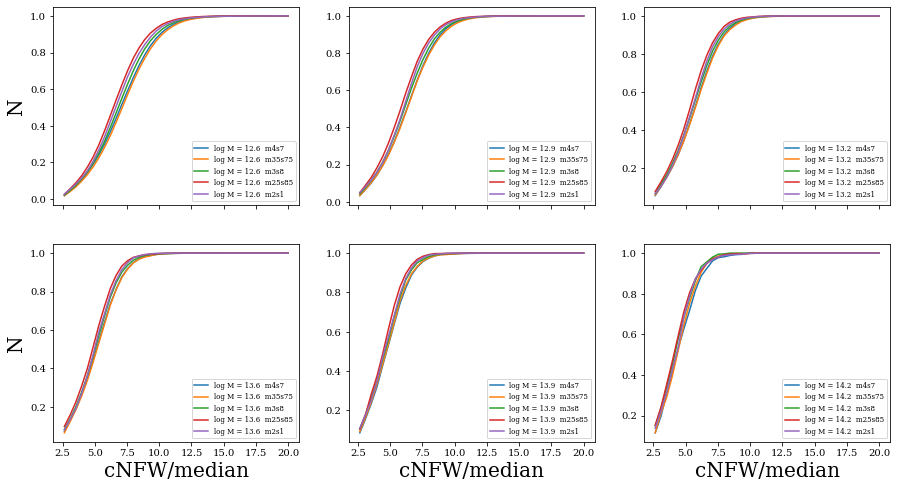

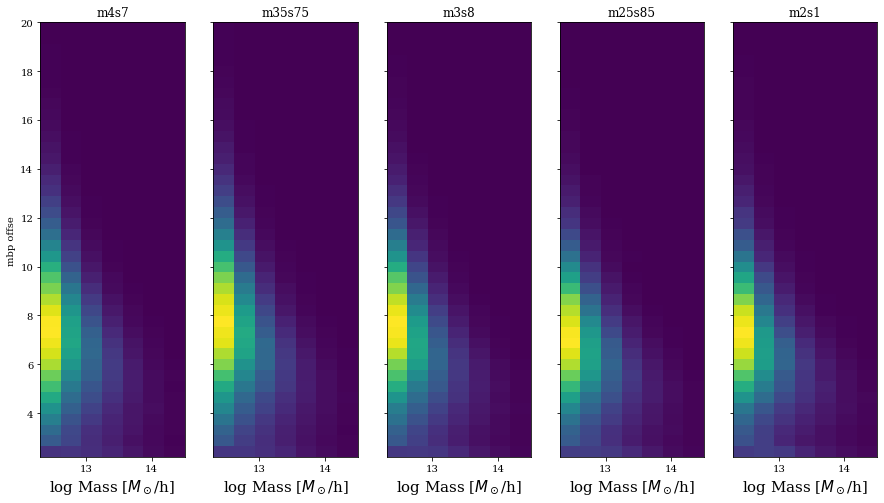

In [9]:
simselec = [-10, -5, -6, -12, -1]
nsims, nbins_m, nbins_c = len(simselec), 40, 7
prop = 'cNFW(43)'
#prop = 'mbp_offset(15)'
fig, axs = plt.subplots(2, 3, sharex=True, figsize=[15, 8])
fig2, axs2 = plt.subplots(1, nsims, sharey=True, figsize=[15, 8])
tosave = np.zeros((2,3,nsims,2,nbins_m))

colormaps = ['Greys', 'YlOrBr', 'Wistia']
#meds = np.zeros((nsims, nbins_c-1))
for i, s in zip(range(nsims), simselec):
    print(s)
    sim1 = sm.Simulation(sim_names[s], omegas[s], sigmas[s], path)
    halos = sim1.read_halos(snapshot=0)
    reds = sim1.get_redshifts()
    masses = halos['Mhalo(4)']
    str_prop = halos[prop]
    min_r, max_r = np.mean(str_prop) - 2*np.std(str_prop), np.mean(str_prop) + 2*np.std(str_prop)
    #h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), conc, cmap = cmp, range=[[np.log10(3*np.min(masses)), 14], [2.3, 14]], bins=80)
    h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), str_prop, range=[[12.3, 14.5], [2.2, 20]], density=True, bins=[nbins_c, nbins_m])

    axs2[i].set_title(sim_names[s])

    axs2[i].set_xlabel(r'log Mass [$M_\odot$/h]', size=15)
    axs2[i].set_ylabel('mbp offset'[:9*(i==0)])
    for k in range(1, 7):
        cum_hist = np.cumsum(h[k, :])/np.cumsum(h[k, :])[-1]
        med_idx = np.min(np.where(cum_hist>0.5))
        med = yedges[1:][med_idx]
        #meds[i,k-1] = med
        axs[(k-1)//3, (k-1)%3].plot(yedges[1:], cum_hist,  label='log M = {:2.1f}  '.format(xedges[k])+sim_names[s])
        #axs[(k-1)//3, (k-1)%3].plot((yedges[1:]-np.average(meds[i,:]))/np.average(meds[i,:]), cum_hist,  label='log M = {:2.1f}  '.format(xedges[k])+sim_names[s])
        #axs[(k-1)//3, (k-1)%3].set_xlim(-0.3,1)
        # axs[(k-1)//3, (k-1)%3].set_ylim(0.4,0.6)
        tosave[(k-1)//3, (k-1)%3, i, :, :] = np.array([yedges[1:], h[k, :]])
        
        if i == nsims-1:
            axs[(k-1)//3, (k-1)%3].legend()
            if (k-1)%3 == 0:
                axs[(k-1)//3, (k-1)%3].set_ylabel('N', size=20)
            if (k-1)//3 == 1:
                axs[(k-1)//3, (k-1)%3].set_xlabel(prop[:-4]+'/median', size=20)  
# fig.savefig('./figs/{}_vs_cosmo_cum_banana.png'.format(prop[:-4]), dpi=650, facecolor='white', transparent=False, bbox_inches='tight')
# np.save('./data/{}_vs_cosmo_cum_banana.npy'.format(prop[:-4]), tosave)

## $\Omega_m = 0.2$

-1
-8
-11


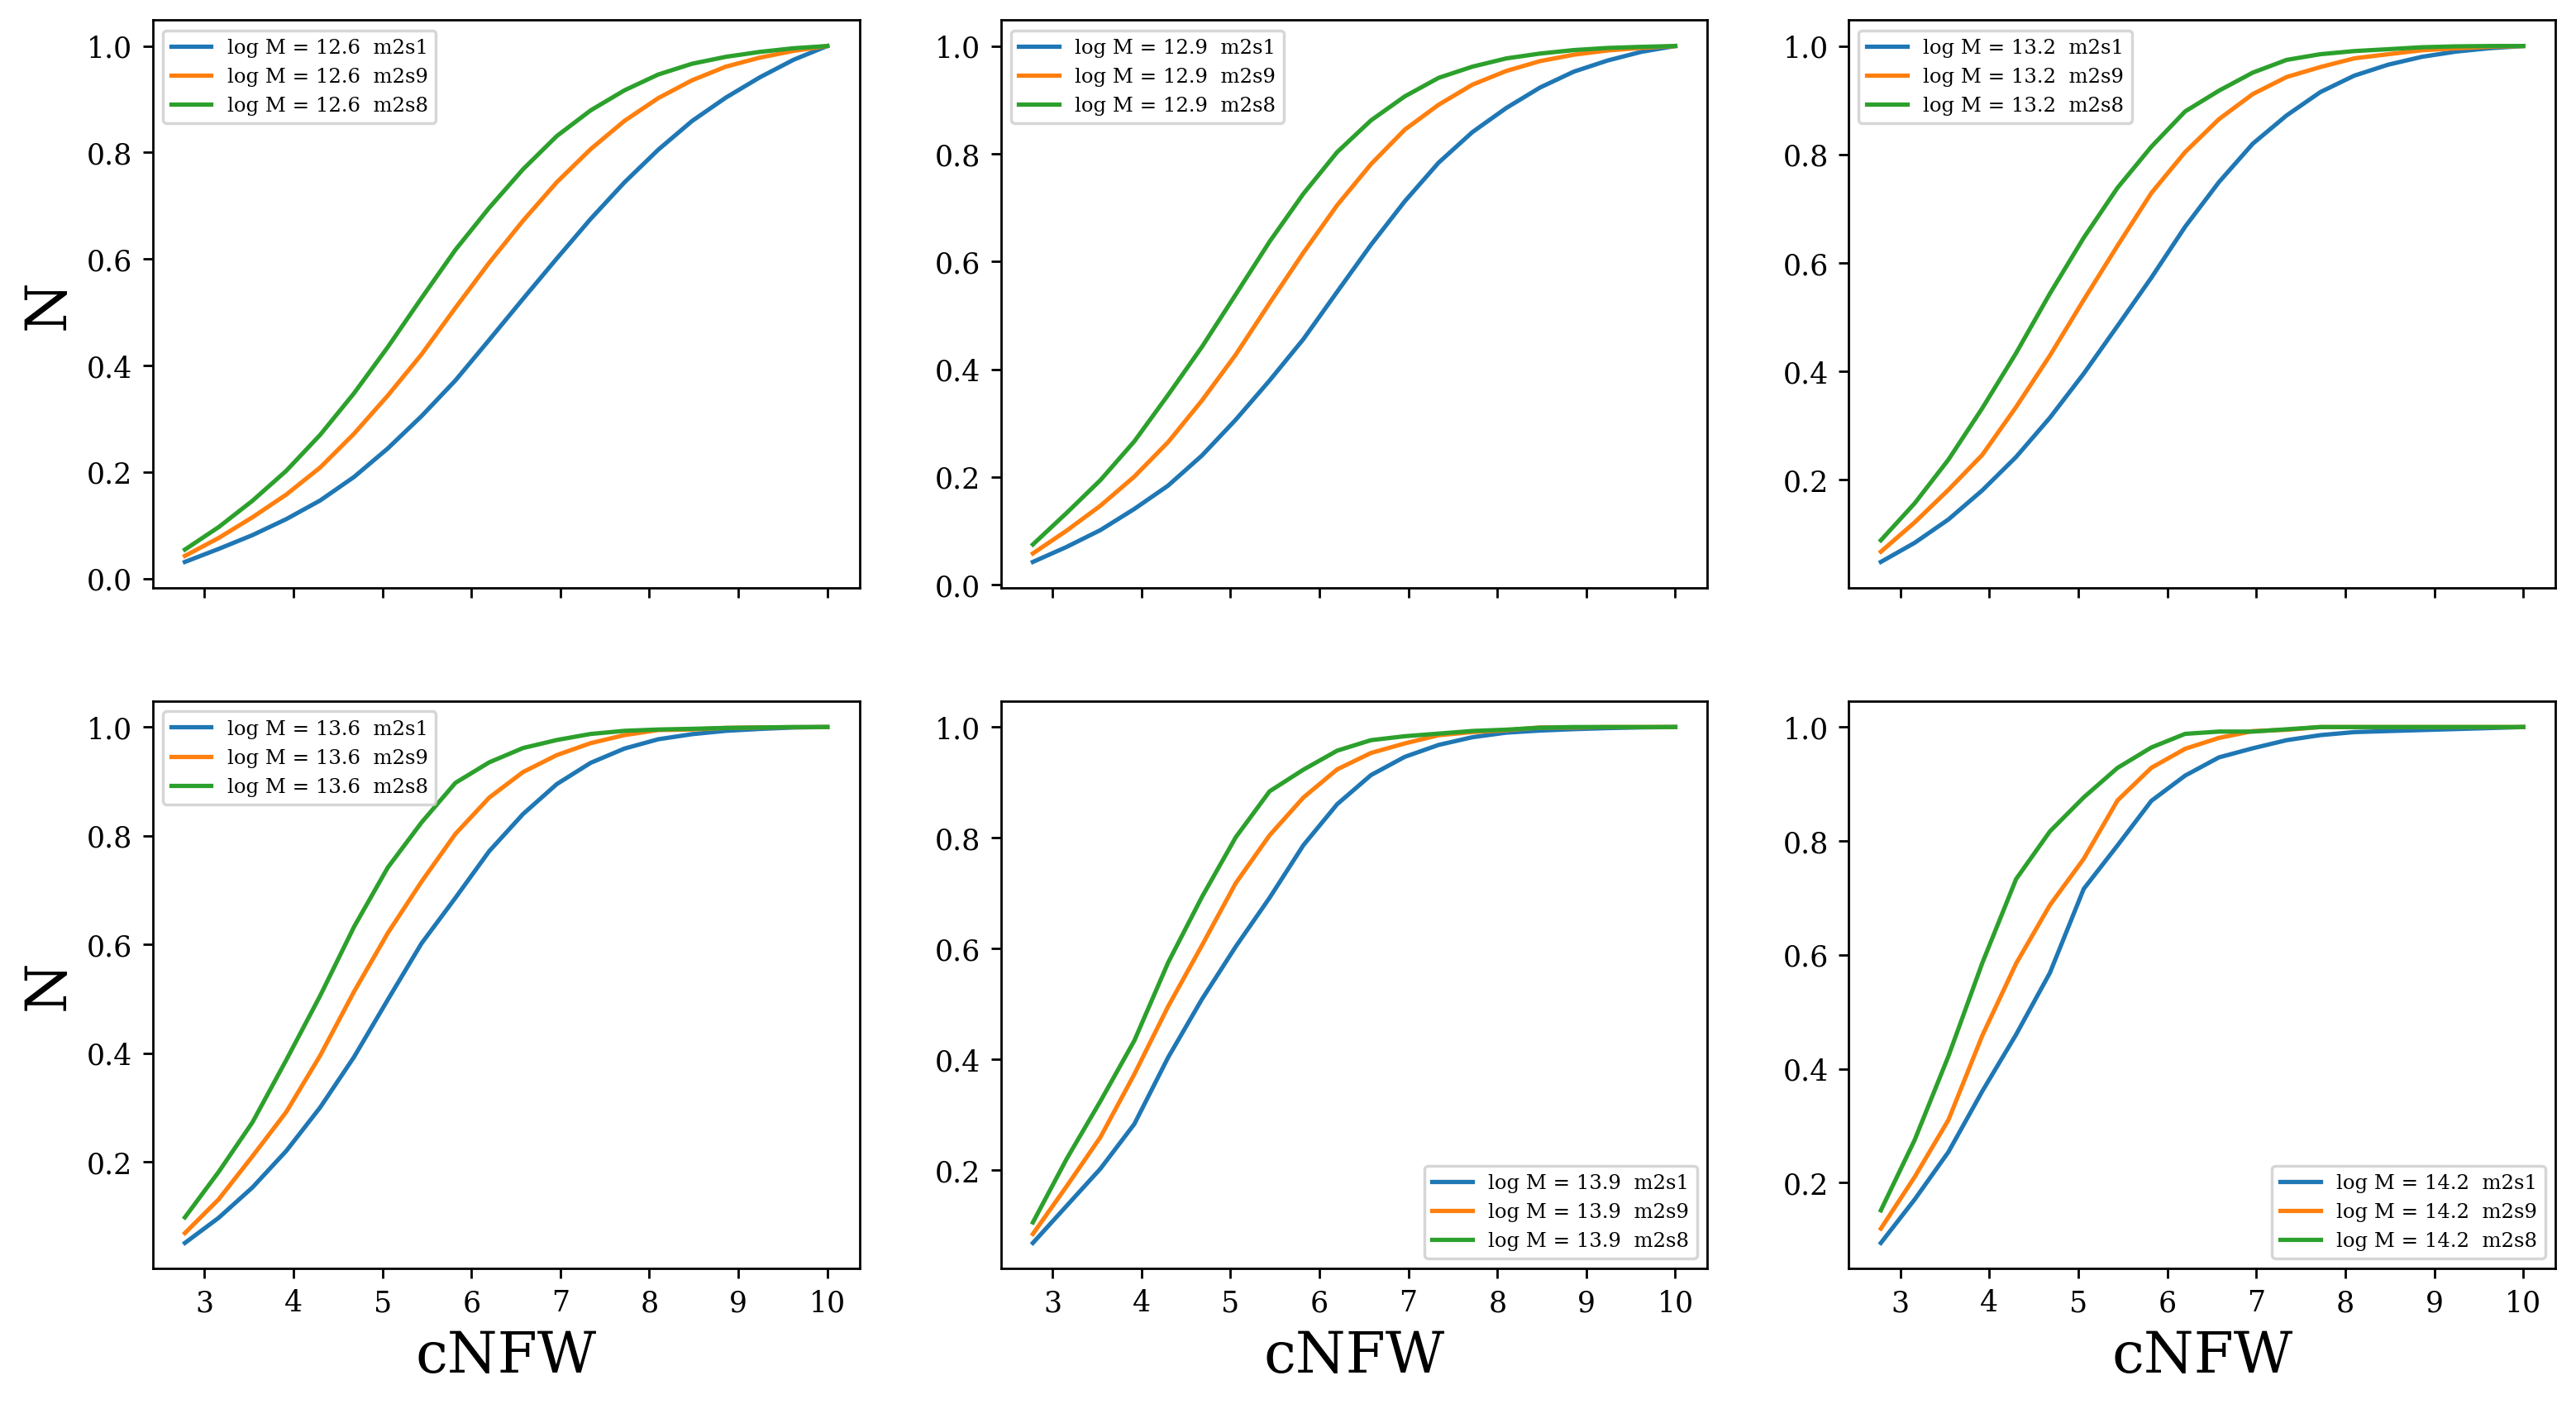

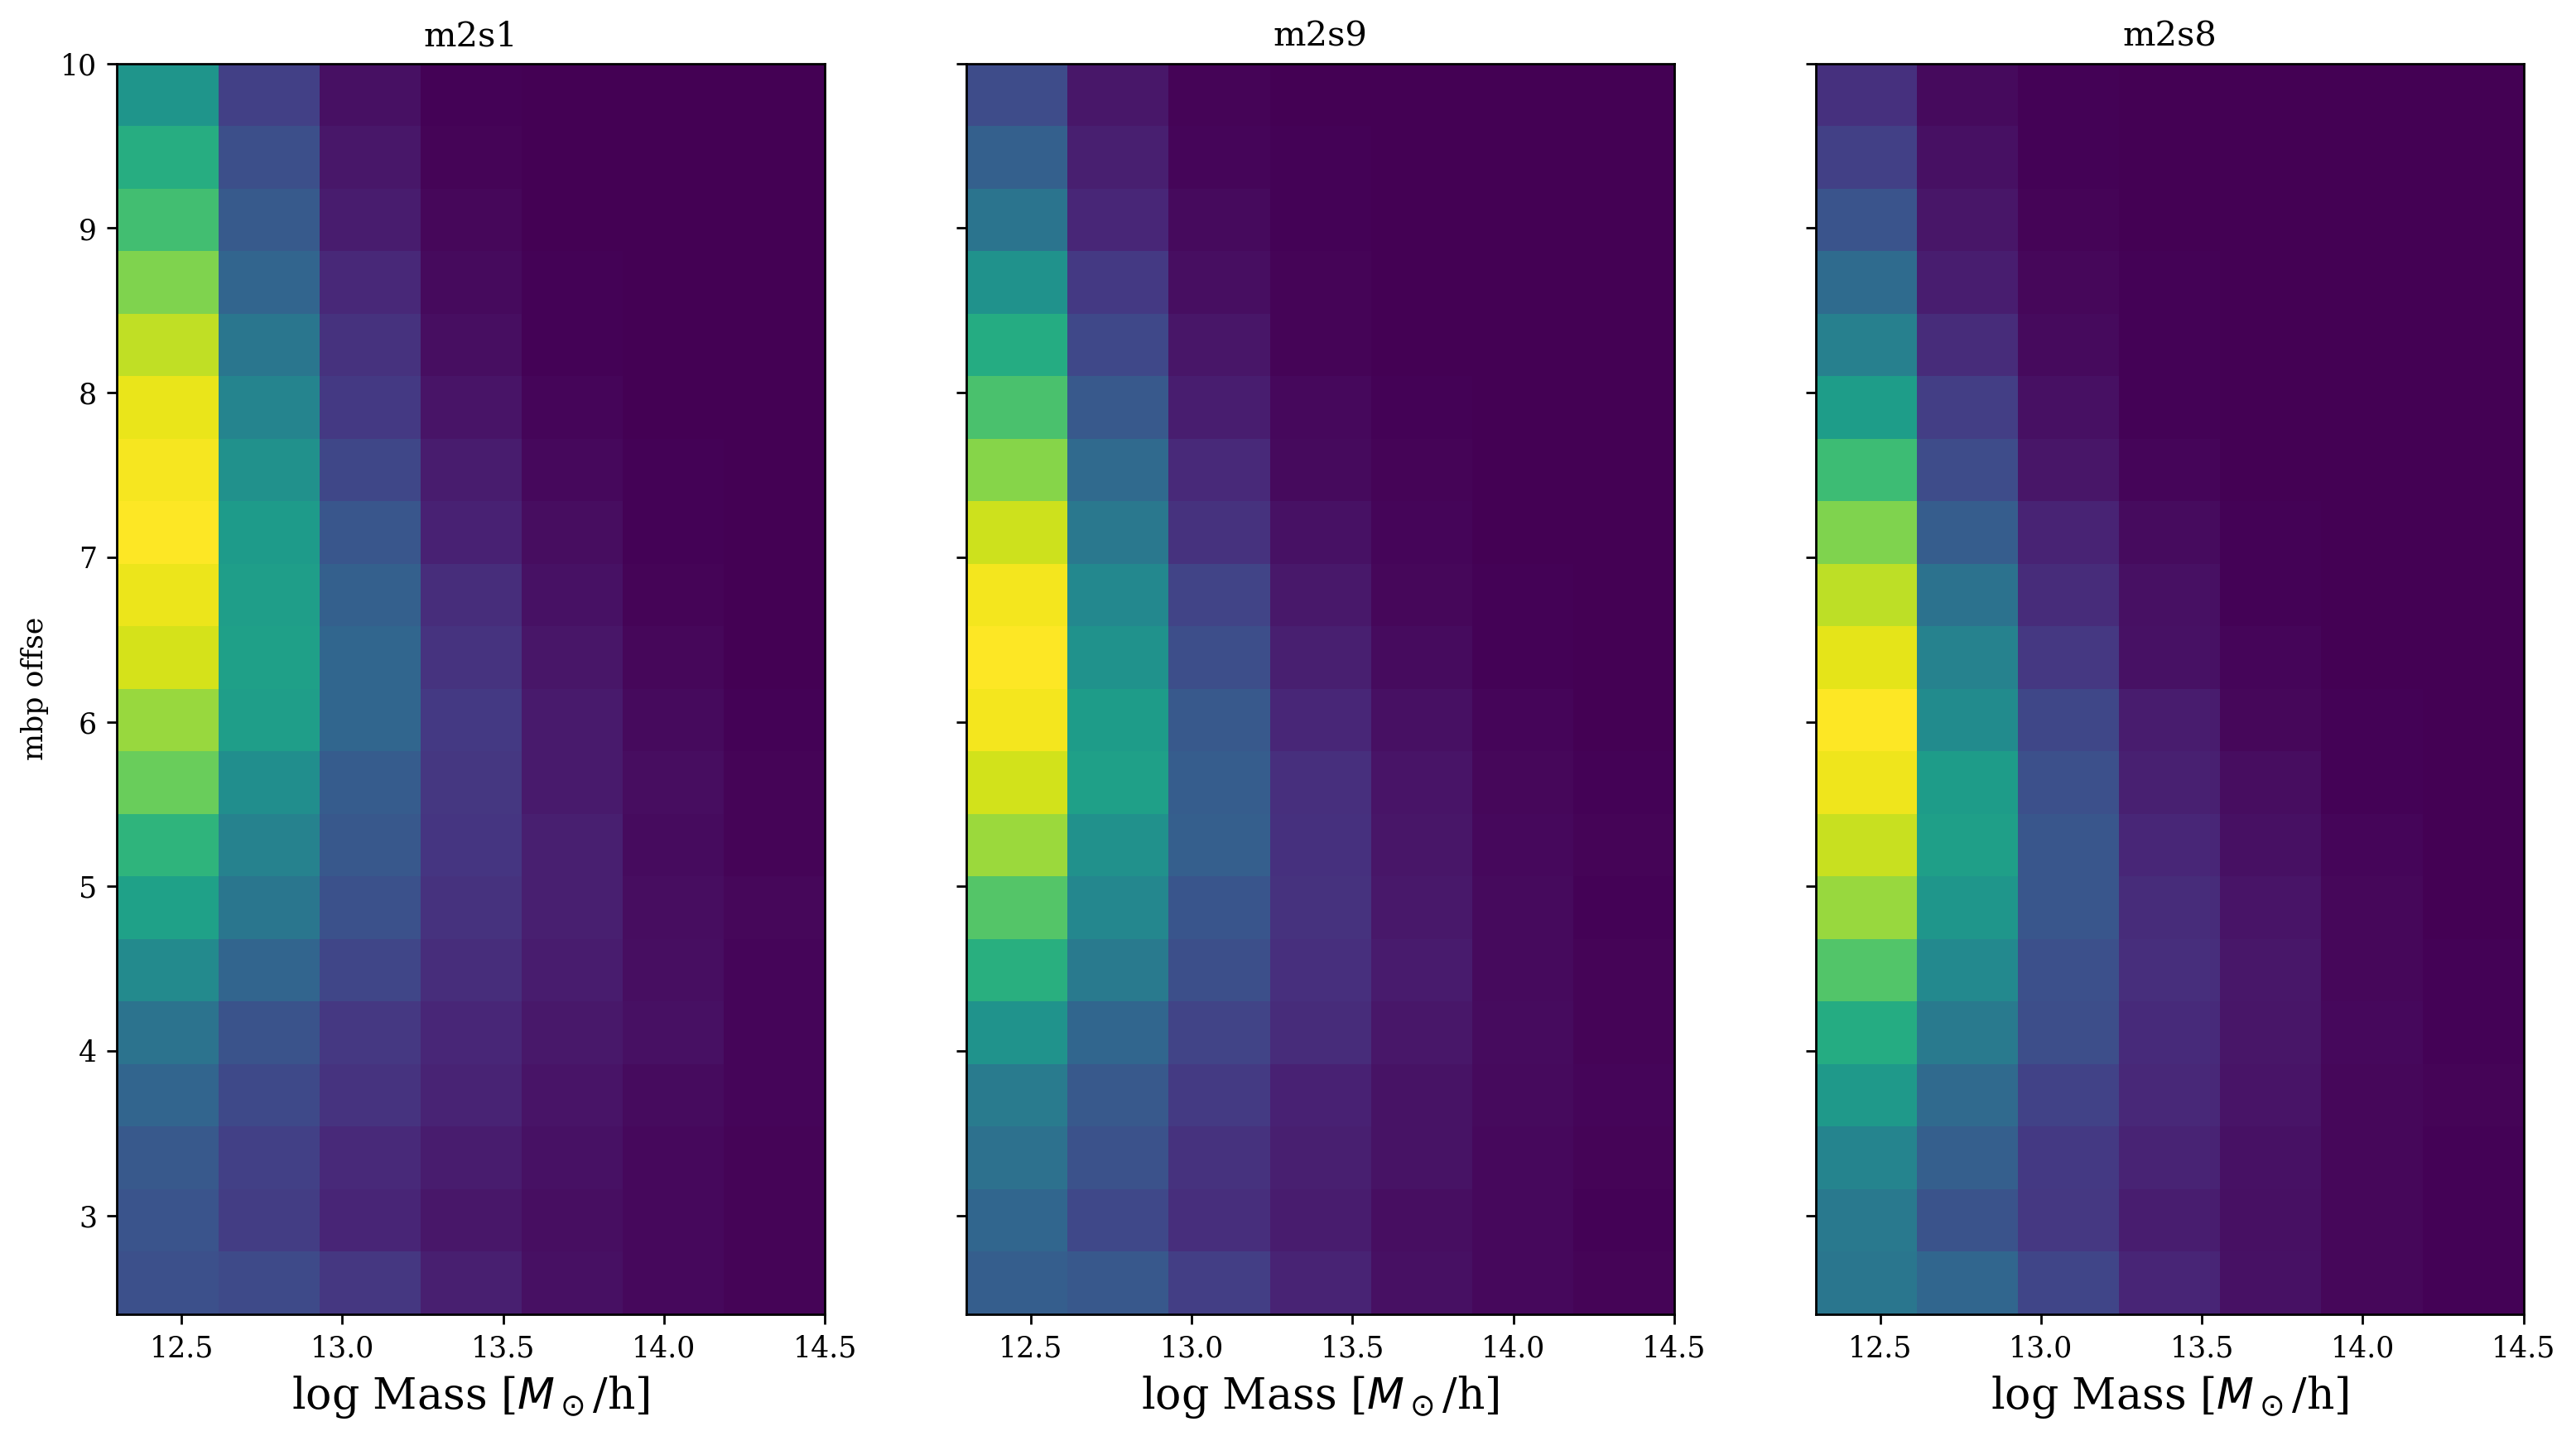

In [14]:
simselec = [-1, -8, -11]
nsims, nbins_m, nbins_c = len(simselec), 20, 7
prop = 'mbp_offset(15)'

fig, axs = plt.subplots(2, 3, sharex=True, figsize=[15, 8])
fig2, axs2 = plt.subplots(1, nsims, sharey=True, figsize=[15, 8])
tosave = np.zeros((2,3,nsims,2,nbins_m))

colormaps = ['Greys', 'YlOrBr', 'Wistia']

for i, s in zip(range(nsims), simselec):
    print(s)
    sim1 = sm.Simulation(sim_names[s], omegas[s], sigmas[s], path)
    halos = sim1.read_halos(snapshot=0)
    reds = sim1.get_redshifts()
    masses = halos['Mhalo(4)']
    str_prop = halos[prop]
    #min_r, max_r = np.mean(str_prop) - 2*np.std(str_prop), np.mean(str_prop) + 2*np.std(str_prop)
    #h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), conc, cmap = cmp, range=[[np.log10(3*np.min(masses)), 14], [2.3, 14]], bins=80)
    h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), str_prop, density=True, range=[[12.3, 14.5], [2.4, 10]], bins=[nbins_c, nbins_m])

    axs2[i].set_title(sim_names[s])

    axs2[i].set_xlabel(r'log Mass [$M_\odot$/h]', size=15)
    axs2[i].set_ylabel('mbp offset'[:9*(i==0)])
    for k in range(1, 7):
        axs[(k-1)//3, (k-1)%3].plot(yedges[1:], np.cumsum(h[k, :])/np.cumsum(h[k, :])[-1],  label='log M = {:2.1f}  '.format(xedges[k])+sim_names[s])
        tosave[(k-1)//3, (k-1)%3, i, :, :] = np.array([yedges[1:], h[k, :]])
        if i == nsims-1:
            axs[(k-1)//3, (k-1)%3].legend()
            if (k-1)%3 == 0:
                axs[(k-1)//3, (k-1)%3].set_ylabel('N', size=20)
            if (k-1)//3 == 1:
                axs[(k-1)//3, (k-1)%3].set_xlabel(prop[:-4], size=20)  
fig.savefig('./figs/{}_vs_cosmo_cum_om2.png'.format(prop[:-4]), dpi=650, facecolor='white', transparent=False, bbox_inches='tight')
np.save('./data/{}_vs_cosmo_cum_om2.npy'.format(prop[:-4]), tosave)

## $\Omega_m = 0.4 $

-4
-9
-10


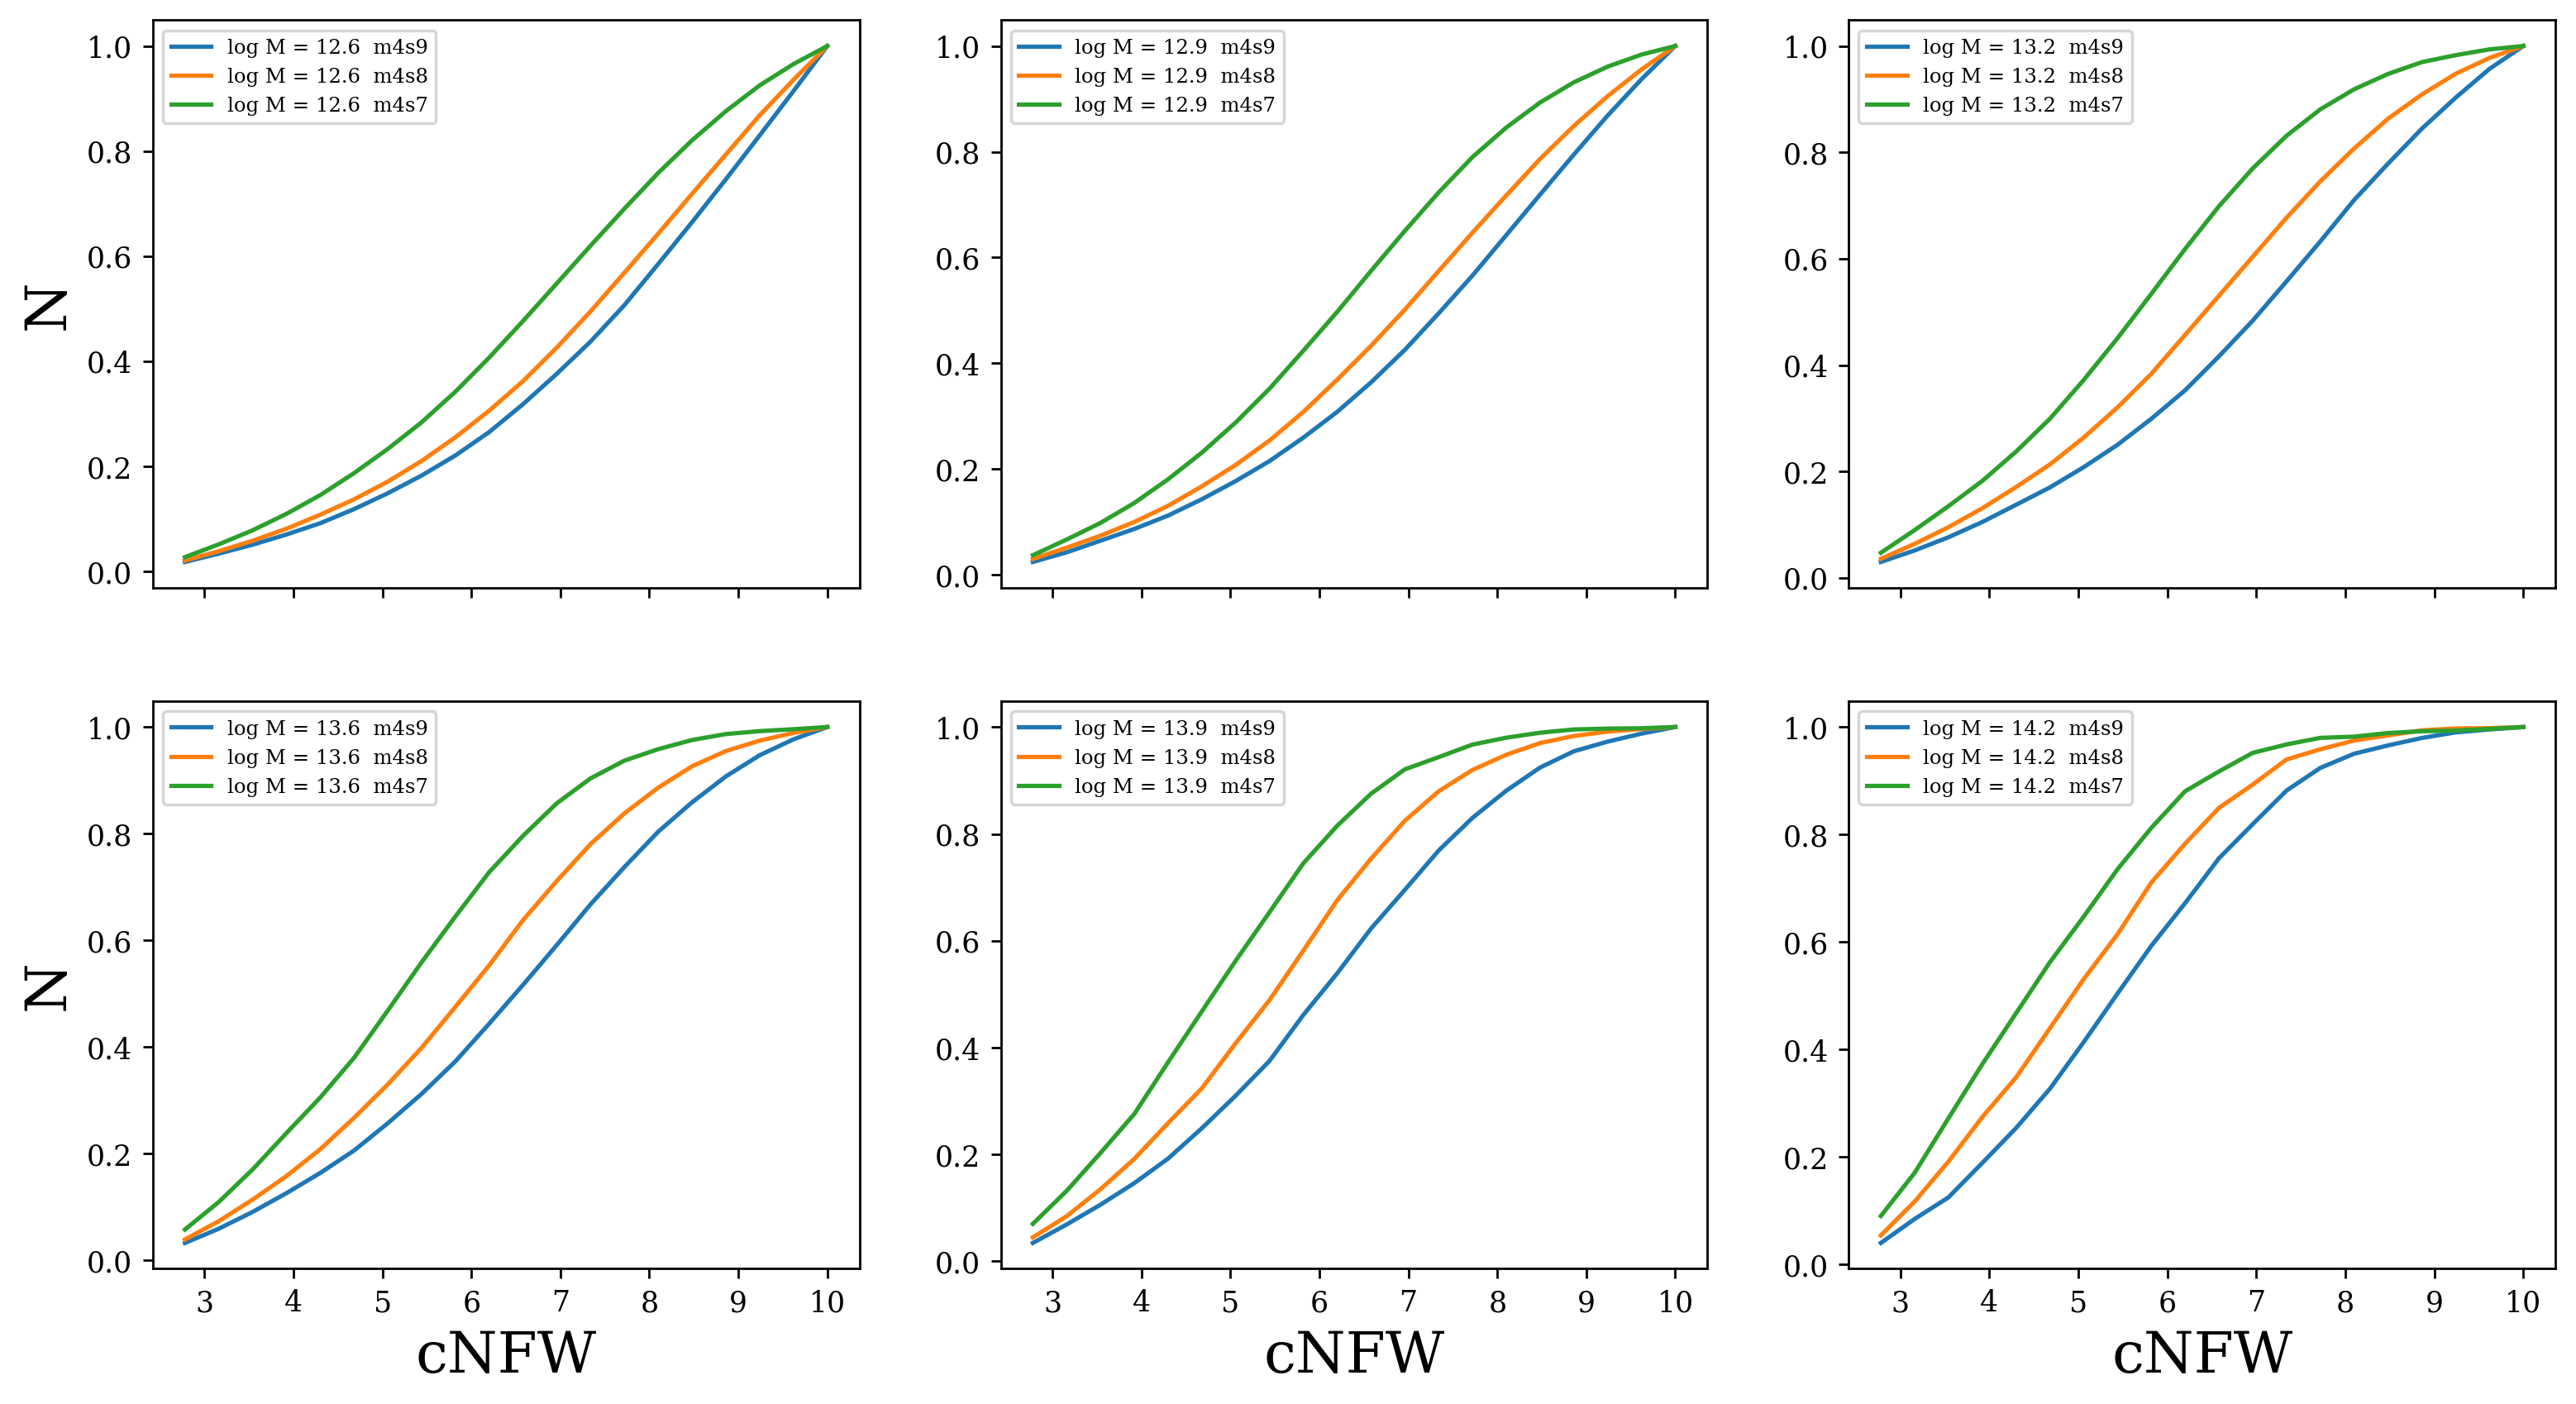

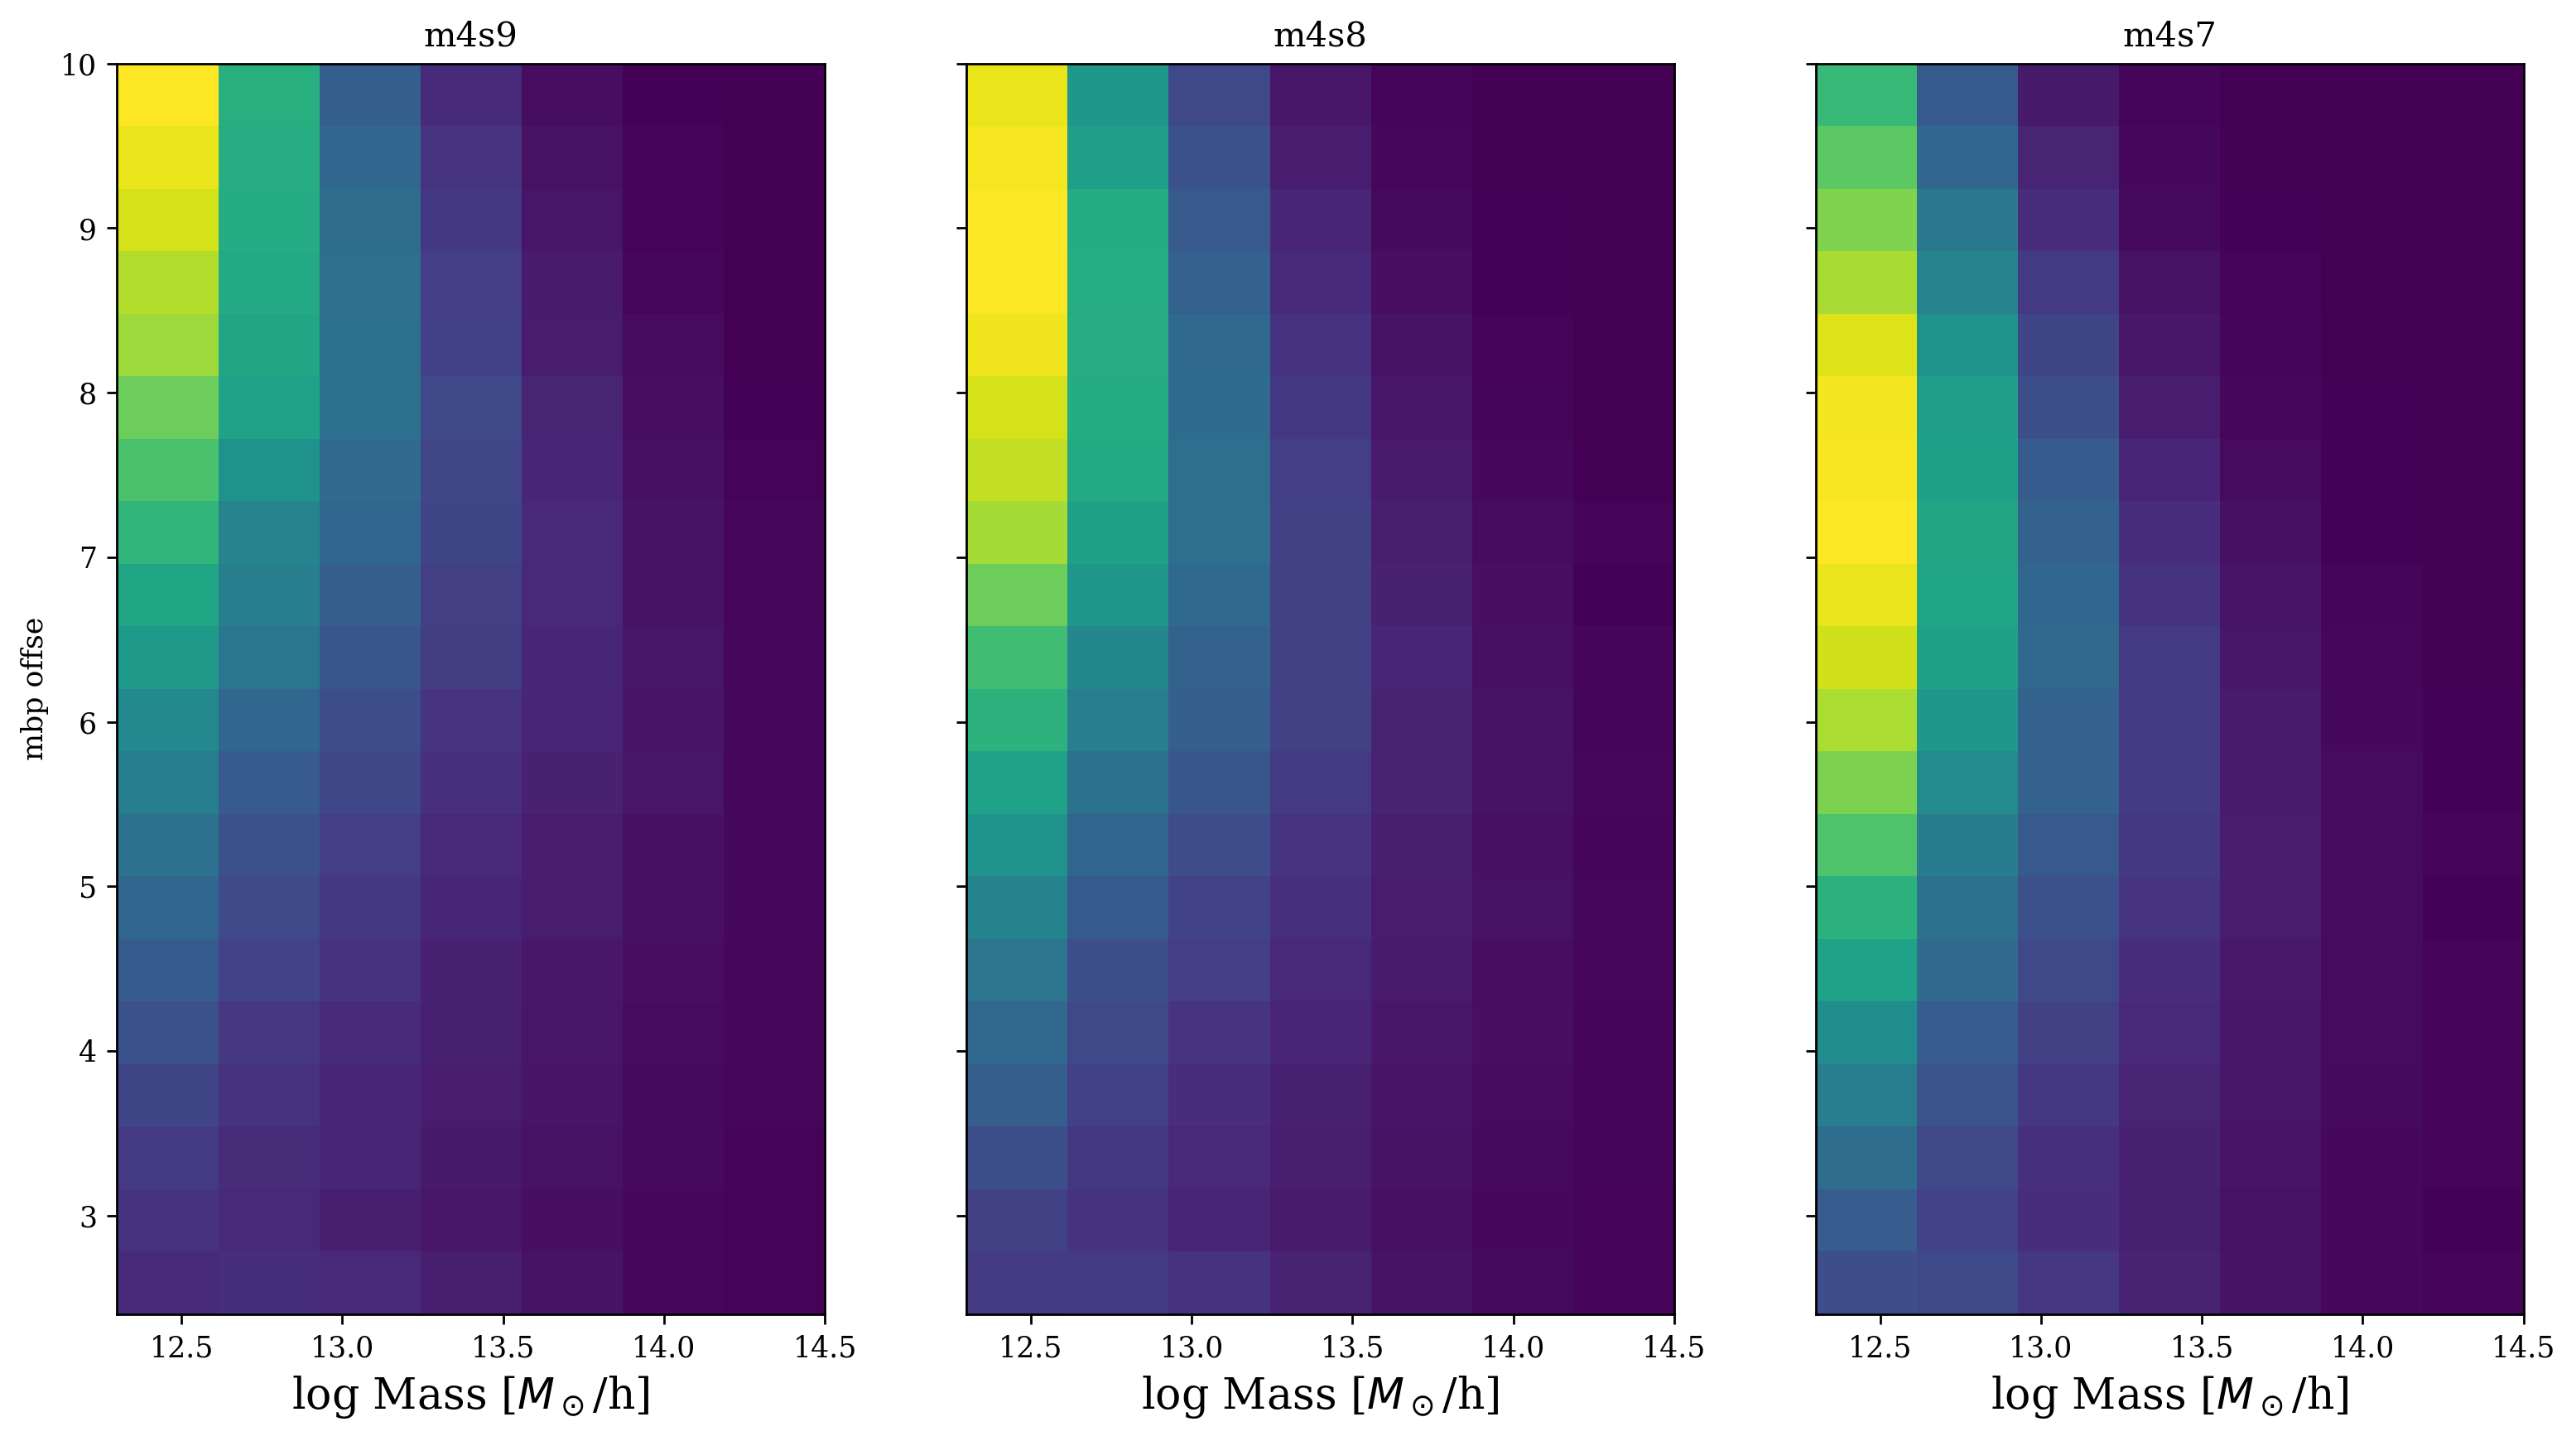

In [16]:
simselec = [-4, -9, -10]
nsims, nbins_m, nbins_c = len(simselec), 20, 7
#prop = 'c(26)'
prop = 'cNFW(43)'

fig, axs = plt.subplots(2, 3, sharex=True, figsize=[15, 8])
fig2, axs2 = plt.subplots(1, nsims, sharey=True, figsize=[15, 8])
tosave = np.zeros((2,3,nsims,2,nbins_m))

colormaps = ['Greys', 'YlOrBr', 'Wistia']

for i, s in zip(range(nsims), simselec):
    print(s)
    sim1 = sm.Simulation(sim_names[s], omegas[s], sigmas[s], path)
    halos = sim1.read_halos(snapshot=0)
    reds = sim1.get_redshifts()
    masses = halos['Mhalo(4)']
    str_prop = halos[prop]
    #min_r, max_r = np.mean(str_prop) - 2*np.std(str_prop), np.mean(str_prop) + 2*np.std(str_prop)
    #h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), conc, cmap = cmp, range=[[np.log10(3*np.min(masses)), 14], [2.3, 14]], bins=80)
    h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), str_prop, density=True, range=[[12.3, 14.5], [2.4, 10]], bins=[nbins_c, nbins_m])

    axs2[i].set_title(sim_names[s])

    axs2[i].set_xlabel(r'log Mass [$M_\odot$/h]', size=15)
    axs2[i].set_ylabel('mbp offset'[:9*(i==0)])
    for k in range(1, 7):
        axs[(k-1)//3, (k-1)%3].plot(yedges[1:], np.cumsum(h[k, :])/np.cumsum(h[k, :])[-1],  label='log M = {:2.1f}  '.format(xedges[k])+sim_names[s])
        tosave[(k-1)//3, (k-1)%3, i, :, :] = np.array([yedges[1:], h[k, :]])
        if i == nsims-1:
            axs[(k-1)//3, (k-1)%3].legend()
            if (k-1)%3 == 0:
                axs[(k-1)//3, (k-1)%3].set_ylabel('N', size=20)
            if (k-1)//3 == 1:
                axs[(k-1)//3, (k-1)%3].set_xlabel(prop[:-4], size=20)  
fig.savefig('./figs/{}_vs_om4_cum_banana.png'.format(prop[:-4]), dpi=650, facecolor='white', transparent=False, bbox_inches='tight')
np.save('./data/{}_vs_om4_cum_banana.npy'.format(prop[:-4]), tosave)

## Secondary quantities 

### Substructure fraction 

-10
-5
-6
-12
-1


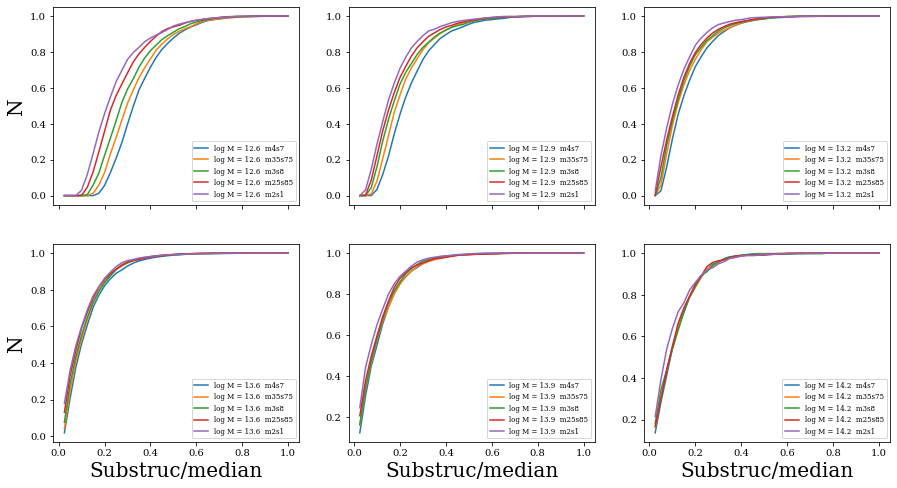

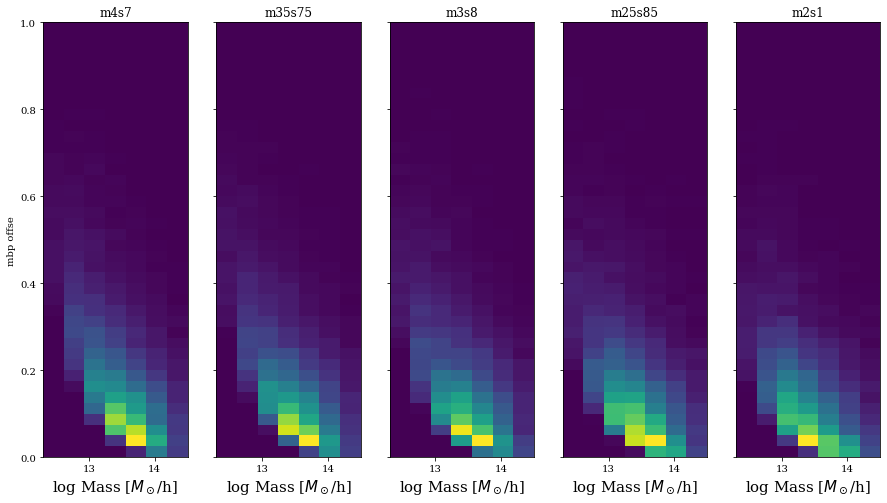

In [4]:
simselec = [-10, -5, -6, -12, -1]
nsims, nbins_m, nbins_c = len(simselec), 40, 7

fig, axs = plt.subplots(2, 3, sharex=True, figsize=[15, 8])
fig2, axs2 = plt.subplots(1, nsims, sharey=True, figsize=[15, 8])
tosave = np.zeros((2,3,nsims,2,nbins_m))
prop = "Substructure"
#meds = np.zeros((nsims, nbins_c-1))
for i, s in zip(range(nsims), simselec):
    print(s)
    sim1 = sm.Simulation(sim_names[s], omegas[s], sigmas[s], path)
    
    subs = sim1.get_subfrac()
    
    reds = sim1.get_redshifts()
    masses, str_prop = subs[:, 1], subs[:, 2]
    min_r, max_r = np.mean(str_prop) - 2*np.std(str_prop), np.mean(str_prop) + 2*np.std(str_prop)
    #h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), conc, cmap = cmp, range=[[np.log10(3*np.min(masses)), 14], [2.3, 14]], bins=80)
    h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), str_prop, range=[[12.3, 14.5], [0, 1]], density=True, bins=[nbins_c, nbins_m])

    axs2[i].set_title(sim_names[s])

    axs2[i].set_xlabel(r'log Mass [$M_\odot$/h]', size=15)
    axs2[i].set_ylabel('mbp offset'[:9*(i==0)])
    for k in range(1, 7):
        cum_hist = np.cumsum(h[k, :])/np.cumsum(h[k, :])[-1]
        med_idx = np.min(np.where(cum_hist>0.5))
        med = yedges[1:][med_idx]
        #meds[i,k-1] = med
        axs[(k-1)//3, (k-1)%3].plot(yedges[1:], cum_hist,  label='log M = {:2.1f}  '.format(xedges[k])+sim_names[s])
        #axs[(k-1)//3, (k-1)%3].plot((yedges[1:]-np.average(meds[i,:]))/np.average(meds[i,:]), cum_hist,  label='log M = {:2.1f}  '.format(xedges[k])+sim_names[s])
        #axs[(k-1)//3, (k-1)%3].set_xlim(-0.3,0.3)
        # axs[(k-1)//3, (k-1)%3].set_ylim(0.4,0.6)
        tosave[(k-1)//3, (k-1)%3, i, :, :] = np.array([yedges[1:], h[k, :]])
        if i == nsims-1:
            axs[(k-1)//3, (k-1)%3].legend()
            if (k-1)%3 == 0:
                axs[(k-1)//3, (k-1)%3].set_ylabel('N', size=20)
            if (k-1)//3 == 1:
                axs[(k-1)//3, (k-1)%3].set_xlabel(prop[:-4]+'/median', size=20)

-1
-8
-11


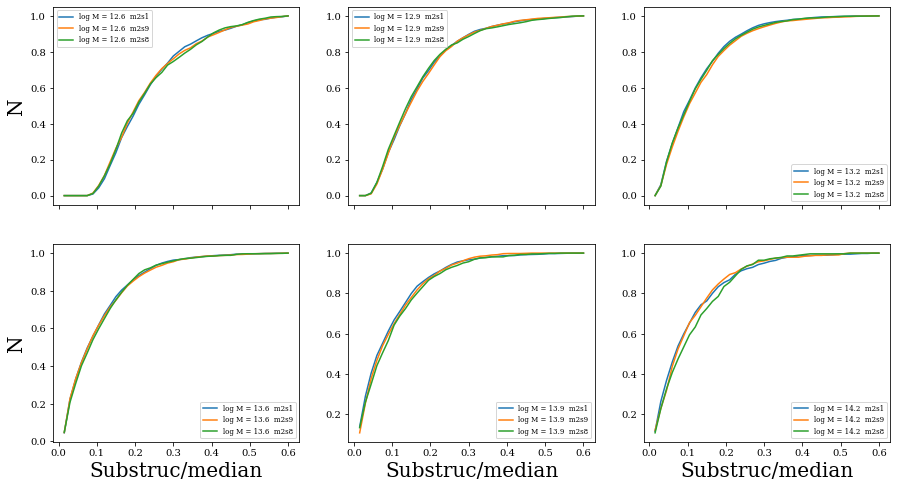

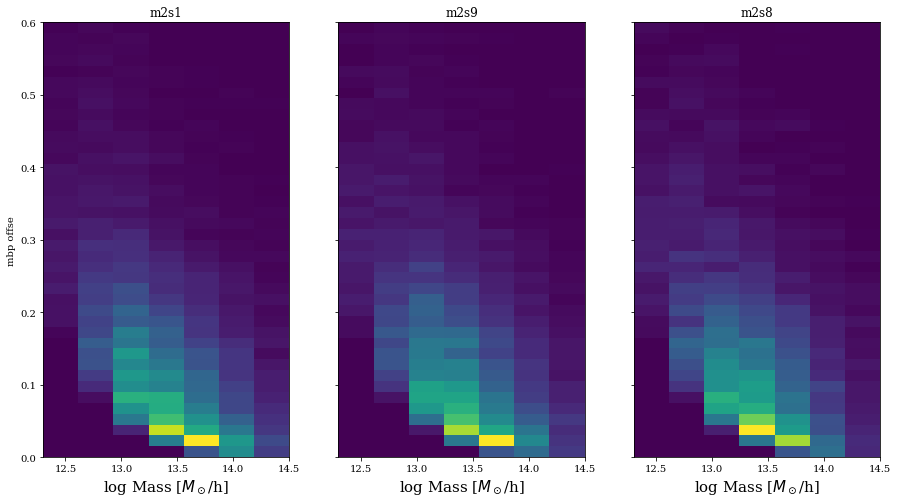

In [6]:
simselec = [-1, -8, -11]
nsims, nbins_m, nbins_c = len(simselec), 40, 7

fig, axs = plt.subplots(2, 3, sharex=True, figsize=[15, 8])
fig2, axs2 = plt.subplots(1, nsims, sharey=True, figsize=[15, 8])
tosave = np.zeros((2,3,nsims,2,nbins_m))
prop = "Substructure"
#meds = np.zeros((nsims, nbins_c-1))
for i, s in zip(range(nsims), simselec):
    print(s)
    sim1 = sm.Simulation(sim_names[s], omegas[s], sigmas[s], path)
    
    subs = sim1.get_subfrac()
    
    reds = sim1.get_redshifts()
    masses, str_prop = subs[:, 1], subs[:, 2]
    min_r, max_r = np.mean(str_prop) - 2*np.std(str_prop), np.mean(str_prop) + 2*np.std(str_prop)
    #h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), conc, cmap = cmp, range=[[np.log10(3*np.min(masses)), 14], [2.3, 14]], bins=80)
    h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), str_prop, range=[[12.3, 14.5], [0, 0.6]], density=True, bins=[nbins_c, nbins_m])

    axs2[i].set_title(sim_names[s])

    axs2[i].set_xlabel(r'log Mass [$M_\odot$/h]', size=15)
    axs2[i].set_ylabel('mbp offset'[:9*(i==0)])
    for k in range(1, 7):
        cum_hist = np.cumsum(h[k, :])/np.cumsum(h[k, :])[-1]
        med_idx = np.min(np.where(cum_hist>0.5))
        med = yedges[1:][med_idx]
        #meds[i,k-1] = med
        axs[(k-1)//3, (k-1)%3].plot(yedges[1:], cum_hist,  label='log M = {:2.1f}  '.format(xedges[k])+sim_names[s])
        #axs[(k-1)//3, (k-1)%3].plot((yedges[1:]-np.average(meds[i,:]))/np.average(meds[i,:]), cum_hist,  label='log M = {:2.1f}  '.format(xedges[k])+sim_names[s])
        #axs[(k-1)//3, (k-1)%3].set_xlim(-0.3,0.3)
        # axs[(k-1)//3, (k-1)%3].set_ylim(0.4,0.6)
        tosave[(k-1)//3, (k-1)%3, i, :, :] = np.array([yedges[1:], h[k, :]])
        if i == nsims-1:
            axs[(k-1)//3, (k-1)%3].legend()
            if (k-1)%3 == 0:
                axs[(k-1)//3, (k-1)%3].set_ylabel('N', size=20)
            if (k-1)//3 == 1:
                axs[(k-1)//3, (k-1)%3].set_xlabel(prop[:-4]+'/median', size=20)

-4
-9
-10


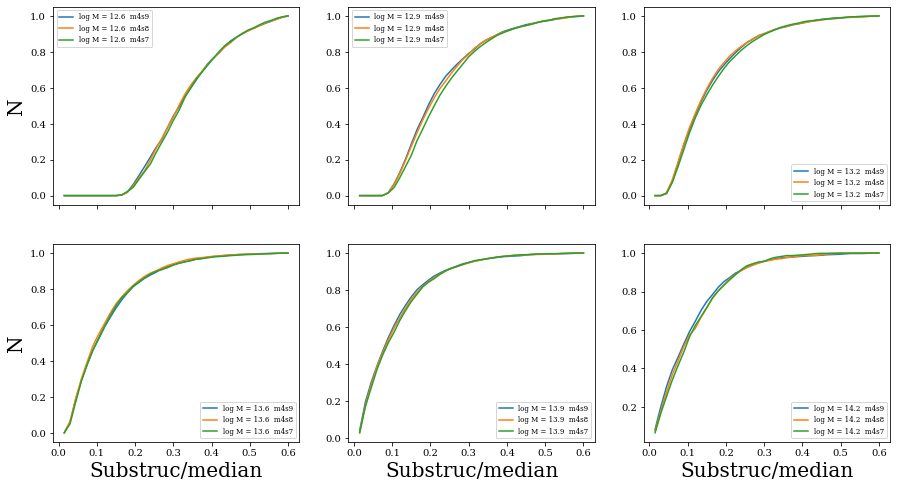

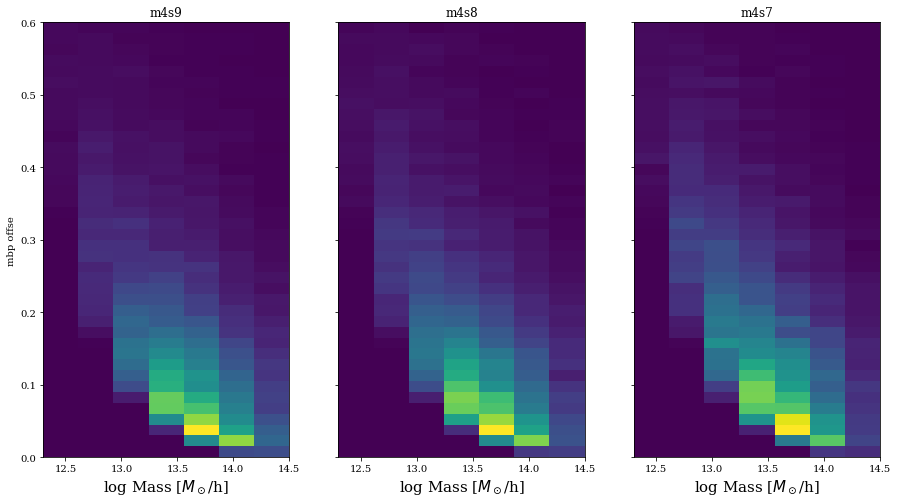

In [9]:
simselec = [-4, -9, -10]
nsims, nbins_m, nbins_c = len(simselec), 40, 7

fig, axs = plt.subplots(2, 3, sharex=True, figsize=[15, 8])
fig2, axs2 = plt.subplots(1, nsims, sharey=True, figsize=[15, 8])
tosave = np.zeros((2,3,nsims,2,nbins_m))
prop = "Substructure"
#meds = np.zeros((nsims, nbins_c-1))
for i, s in zip(range(nsims), simselec):
    print(s)
    sim1 = sm.Simulation(sim_names[s], omegas[s], sigmas[s], path)
    
    subs = sim1.get_subfrac()
    
    reds = sim1.get_redshifts()
    masses, str_prop = subs[:, 1], subs[:, 2]
    min_r, max_r = np.mean(str_prop) - 2*np.std(str_prop), np.mean(str_prop) + 2*np.std(str_prop)
    #h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), conc, cmap = cmp, range=[[np.log10(3*np.min(masses)), 14], [2.3, 14]], bins=80)
    h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), str_prop, range=[[12.3, 14.5], [0, 0.6]], density=True, bins=[nbins_c, nbins_m])

    axs2[i].set_title(sim_names[s])

    axs2[i].set_xlabel(r'log Mass [$M_\odot$/h]', size=15)
    axs2[i].set_ylabel('mbp offset'[:9*(i==0)])
    for k in range(1, 7):
        cum_hist = np.cumsum(h[k, :])/np.cumsum(h[k, :])[-1]
        med_idx = np.min(np.where(cum_hist>0.5))
        med = yedges[1:][med_idx]
        #meds[i,k-1] = med
        axs[(k-1)//3, (k-1)%3].plot(yedges[1:], cum_hist,  label='log M = {:2.1f}  '.format(xedges[k])+sim_names[s])
        #axs[(k-1)//3, (k-1)%3].plot((yedges[1:]-np.average(meds[i,:]))/np.average(meds[i,:]), cum_hist,  label='log M = {:2.1f}  '.format(xedges[k])+sim_names[s])
        #axs[(k-1)//3, (k-1)%3].set_xlim(-0.3,0.3)
        # axs[(k-1)//3, (k-1)%3].set_ylim(0.4,0.6)
        tosave[(k-1)//3, (k-1)%3, i, :, :] = np.array([yedges[1:], h[k, :]])
        if i == nsims-1:
            axs[(k-1)//3, (k-1)%3].legend()
            if (k-1)%3 == 0:
                axs[(k-1)//3, (k-1)%3].set_ylabel('N', size=20)
            if (k-1)//3 == 1:
                axs[(k-1)//3, (k-1)%3].set_xlabel(prop[:-4]+'/median', size=20)

## TRIAXIALITY 

-10
-5
-6
-12
-1


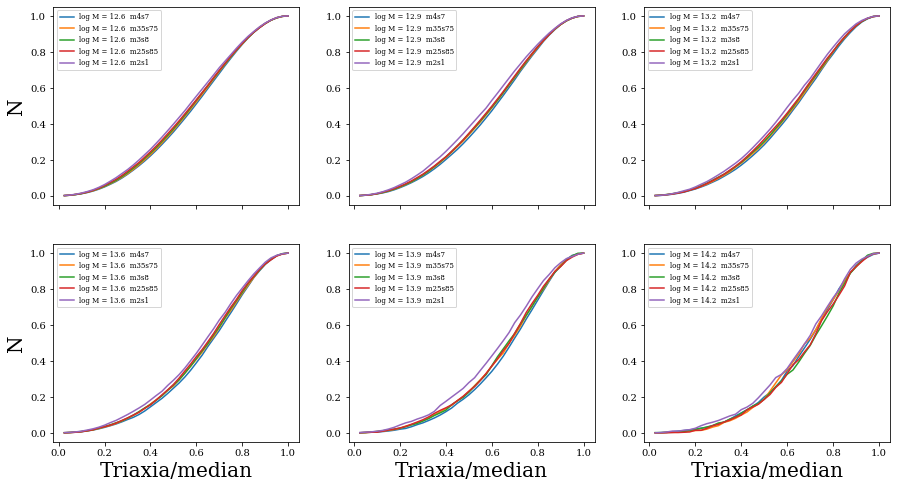

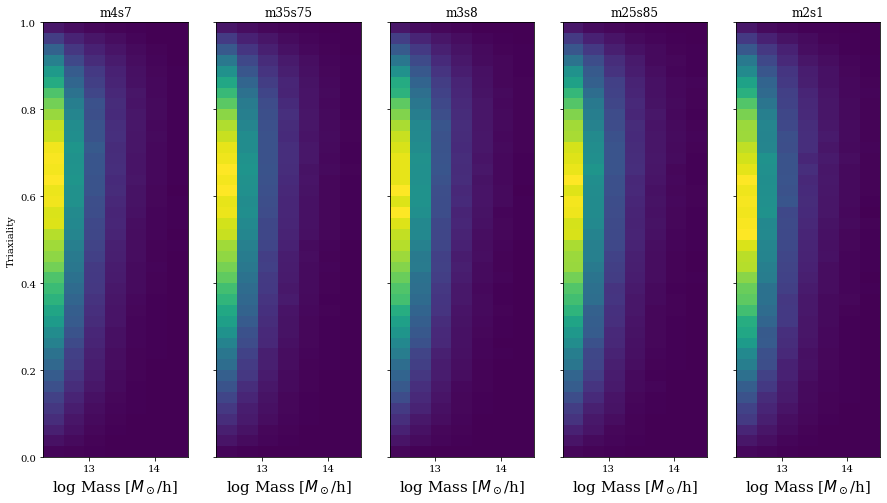

In [6]:
simselec = [-10, -5, -6, -12, -1]
nsims, nbins_m, nbins_c = len(simselec), 40, 7

fig, axs = plt.subplots(2, 3, sharex=True, figsize=[15, 8])
fig2, axs2 = plt.subplots(1, nsims, sharey=True, figsize=[15, 8])
tosave = np.zeros((2,3,nsims,2,nbins_m))
prop = "Triaxiality"
#meds = np.zeros((nsims, nbins_c-1))
for i, s in zip(range(nsims), simselec):
    print(s)
    sim1 = sm.Simulation(sim_names[s], omegas[s], sigmas[s], path)
    
    halos = sim1.read_halos(snapshot=0)
    b = halos['b(25)']
    c = halos['c(26)']
    str_prop =  (1 - b**2)/(1-c**2)
    
    reds = sim1.get_redshifts()
    masses = halos['Mhalo(4)']
    
    min_r, max_r = np.mean(str_prop) - 2*np.std(str_prop), np.mean(str_prop) + 2*np.std(str_prop)
    #h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), conc, cmap = cmp, range=[[np.log10(3*np.min(masses)), 14], [2.3, 14]], bins=80)
    h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), str_prop, range=[[12.3, 14.5], [0, 1]], density=True, bins=[nbins_c, nbins_m])

    axs2[i].set_title(sim_names[s])

    axs2[i].set_xlabel(r'log Mass [$M_\odot$/h]', size=15)
    axs2[i].set_ylabel('Triaxiality'[:11*(i==0)])
    for k in range(1, 7):
        cum_hist = np.cumsum(h[k, :])/np.cumsum(h[k, :])[-1]
        med_idx = np.min(np.where(cum_hist>0.5))
        med = yedges[1:][med_idx]
        #meds[i,k-1] = med
        axs[(k-1)//3, (k-1)%3].plot(yedges[1:], cum_hist,  label='log M = {:2.1f}  '.format(xedges[k])+sim_names[s])
        #axs[(k-1)//3, (k-1)%3].plot((yedges[1:]-np.average(meds[i,:]))/np.average(meds[i,:]), cum_hist,  label='log M = {:2.1f}  '.format(xedges[k])+sim_names[s])
        #axs[(k-1)//3, (k-1)%3].set_xlim(-0.3,0.3)
        # axs[(k-1)//3, (k-1)%3].set_ylim(0.4,0.6)
        tosave[(k-1)//3, (k-1)%3, i, :, :] = np.array([yedges[1:], h[k, :]])
        if i == nsims-1:
            axs[(k-1)//3, (k-1)%3].legend()
            if (k-1)%3 == 0:
                axs[(k-1)//3, (k-1)%3].set_ylabel('N', size=20)
            if (k-1)//3 == 1:
                axs[(k-1)//3, (k-1)%3].set_xlabel(prop[:-4]+'/median', size=20)

-10
-5
-6
-12
-1


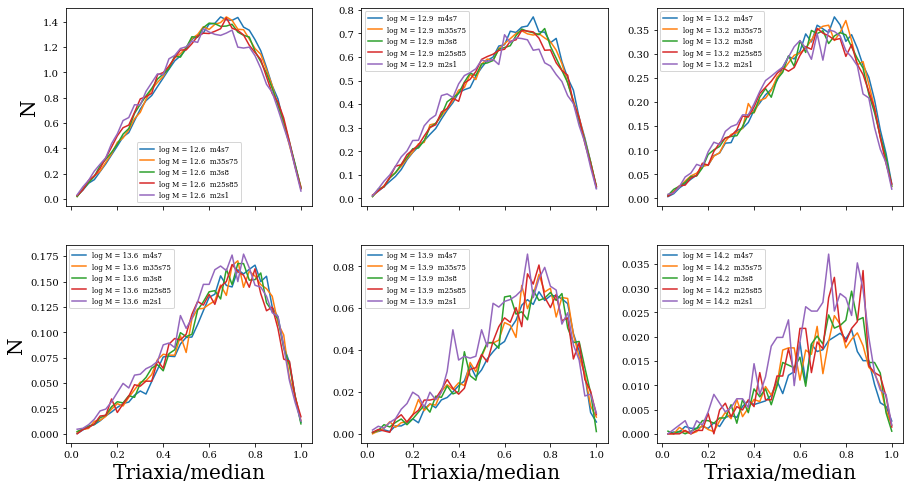

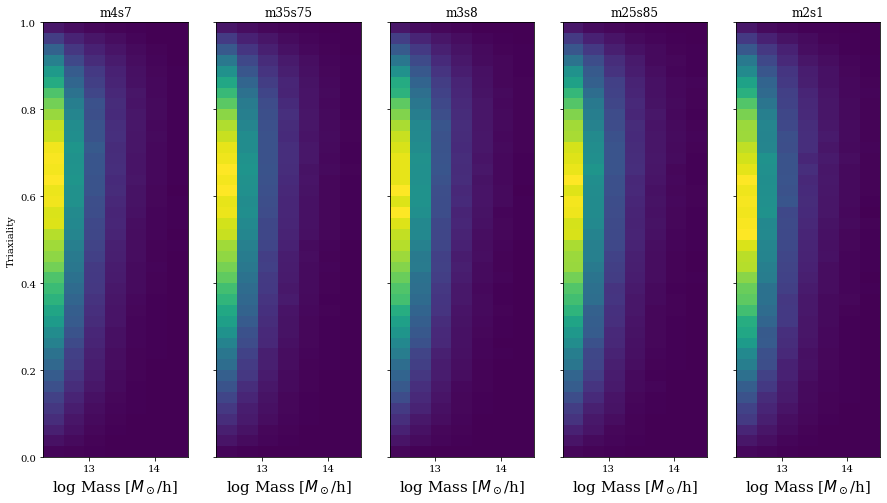

In [7]:
simselec = [-10, -5, -6, -12, -3]
nsims, nbins_m, nbins_c = len(simselec), 40, 7

fig, axs = plt.subplots(2, 3, sharex=True, figsize=[15, 8])
fig2, axs2 = plt.subplots(1, nsims, sharey=True, figsize=[15, 8])
tosave = np.zeros((2,3,nsims,2,nbins_m))
prop = "Triaxiality"
#meds = np.zeros((nsims, nbins_c-1))
for i, s in zip(range(nsims), simselec):
    print(s)
    sim1 = sm.Simulation(sim_names[s], omegas[s], sigmas[s], path)
    
    halos = sim1.read_halos(snapshot=0)
    b = halos['b(25)']
    c = halos['c(26)']
    str_prop =  (1 - b**2)/(1-c**2)
    
    reds = sim1.get_redshifts()
    masses = halos['Mhalo(4)']
    
    min_r, max_r = np.mean(str_prop) - 2*np.std(str_prop), np.mean(str_prop) + 2*np.std(str_prop)
    #h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), conc, cmap = cmp, range=[[np.log10(3*np.min(masses)), 14], [2.3, 14]], bins=80)
    h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), str_prop, range=[[12.3, 14.5], [0, 1]], density=True, bins=[nbins_c, nbins_m])

    axs2[i].set_title(sim_names[s])

    axs2[i].set_xlabel(r'log Mass [$M_\odot$/h]', size=15)
    axs2[i].set_ylabel('Triaxiality'[:11*(i==0)])
    for k in range(1, 7):
        cum_hist = np.cumsum(h[k, :])/np.cumsum(h[k, :])[-1]
        med_idx = np.min(np.where(cum_hist>0.5))
        med = yedges[1:][med_idx]
        #meds[i,k-1] = med
        axs[(k-1)//3, (k-1)%3].plot(yedges[1:], h[k, :],  label='log M = {:2.1f}  '.format(xedges[k])+sim_names[s])
        #axs[(k-1)//3, (k-1)%3].plot((yedges[1:]-np.average(meds[i,:]))/np.average(meds[i,:]), cum_hist,  label='log M = {:2.1f}  '.format(xedges[k])+sim_names[s])
        #axs[(k-1)//3, (k-1)%3].set_xlim(-0.3,0.3)
        # axs[(k-1)//3, (k-1)%3].set_ylim(0.4,0.6)
        tosave[(k-1)//3, (k-1)%3, i, :, :] = np.array([yedges[1:], h[k, :]])
        if i == nsims-1:
            axs[(k-1)//3, (k-1)%3].legend()
            if (k-1)%3 == 0:
                axs[(k-1)//3, (k-1)%3].set_ylabel('N', size=20)
            if (k-1)//3 == 1:
                axs[(k-1)//3, (k-1)%3].set_xlabel(prop[:-4]+'/median', size=20)

## $\Omega_m = 0.3$ 

-5
-8
-2
-1


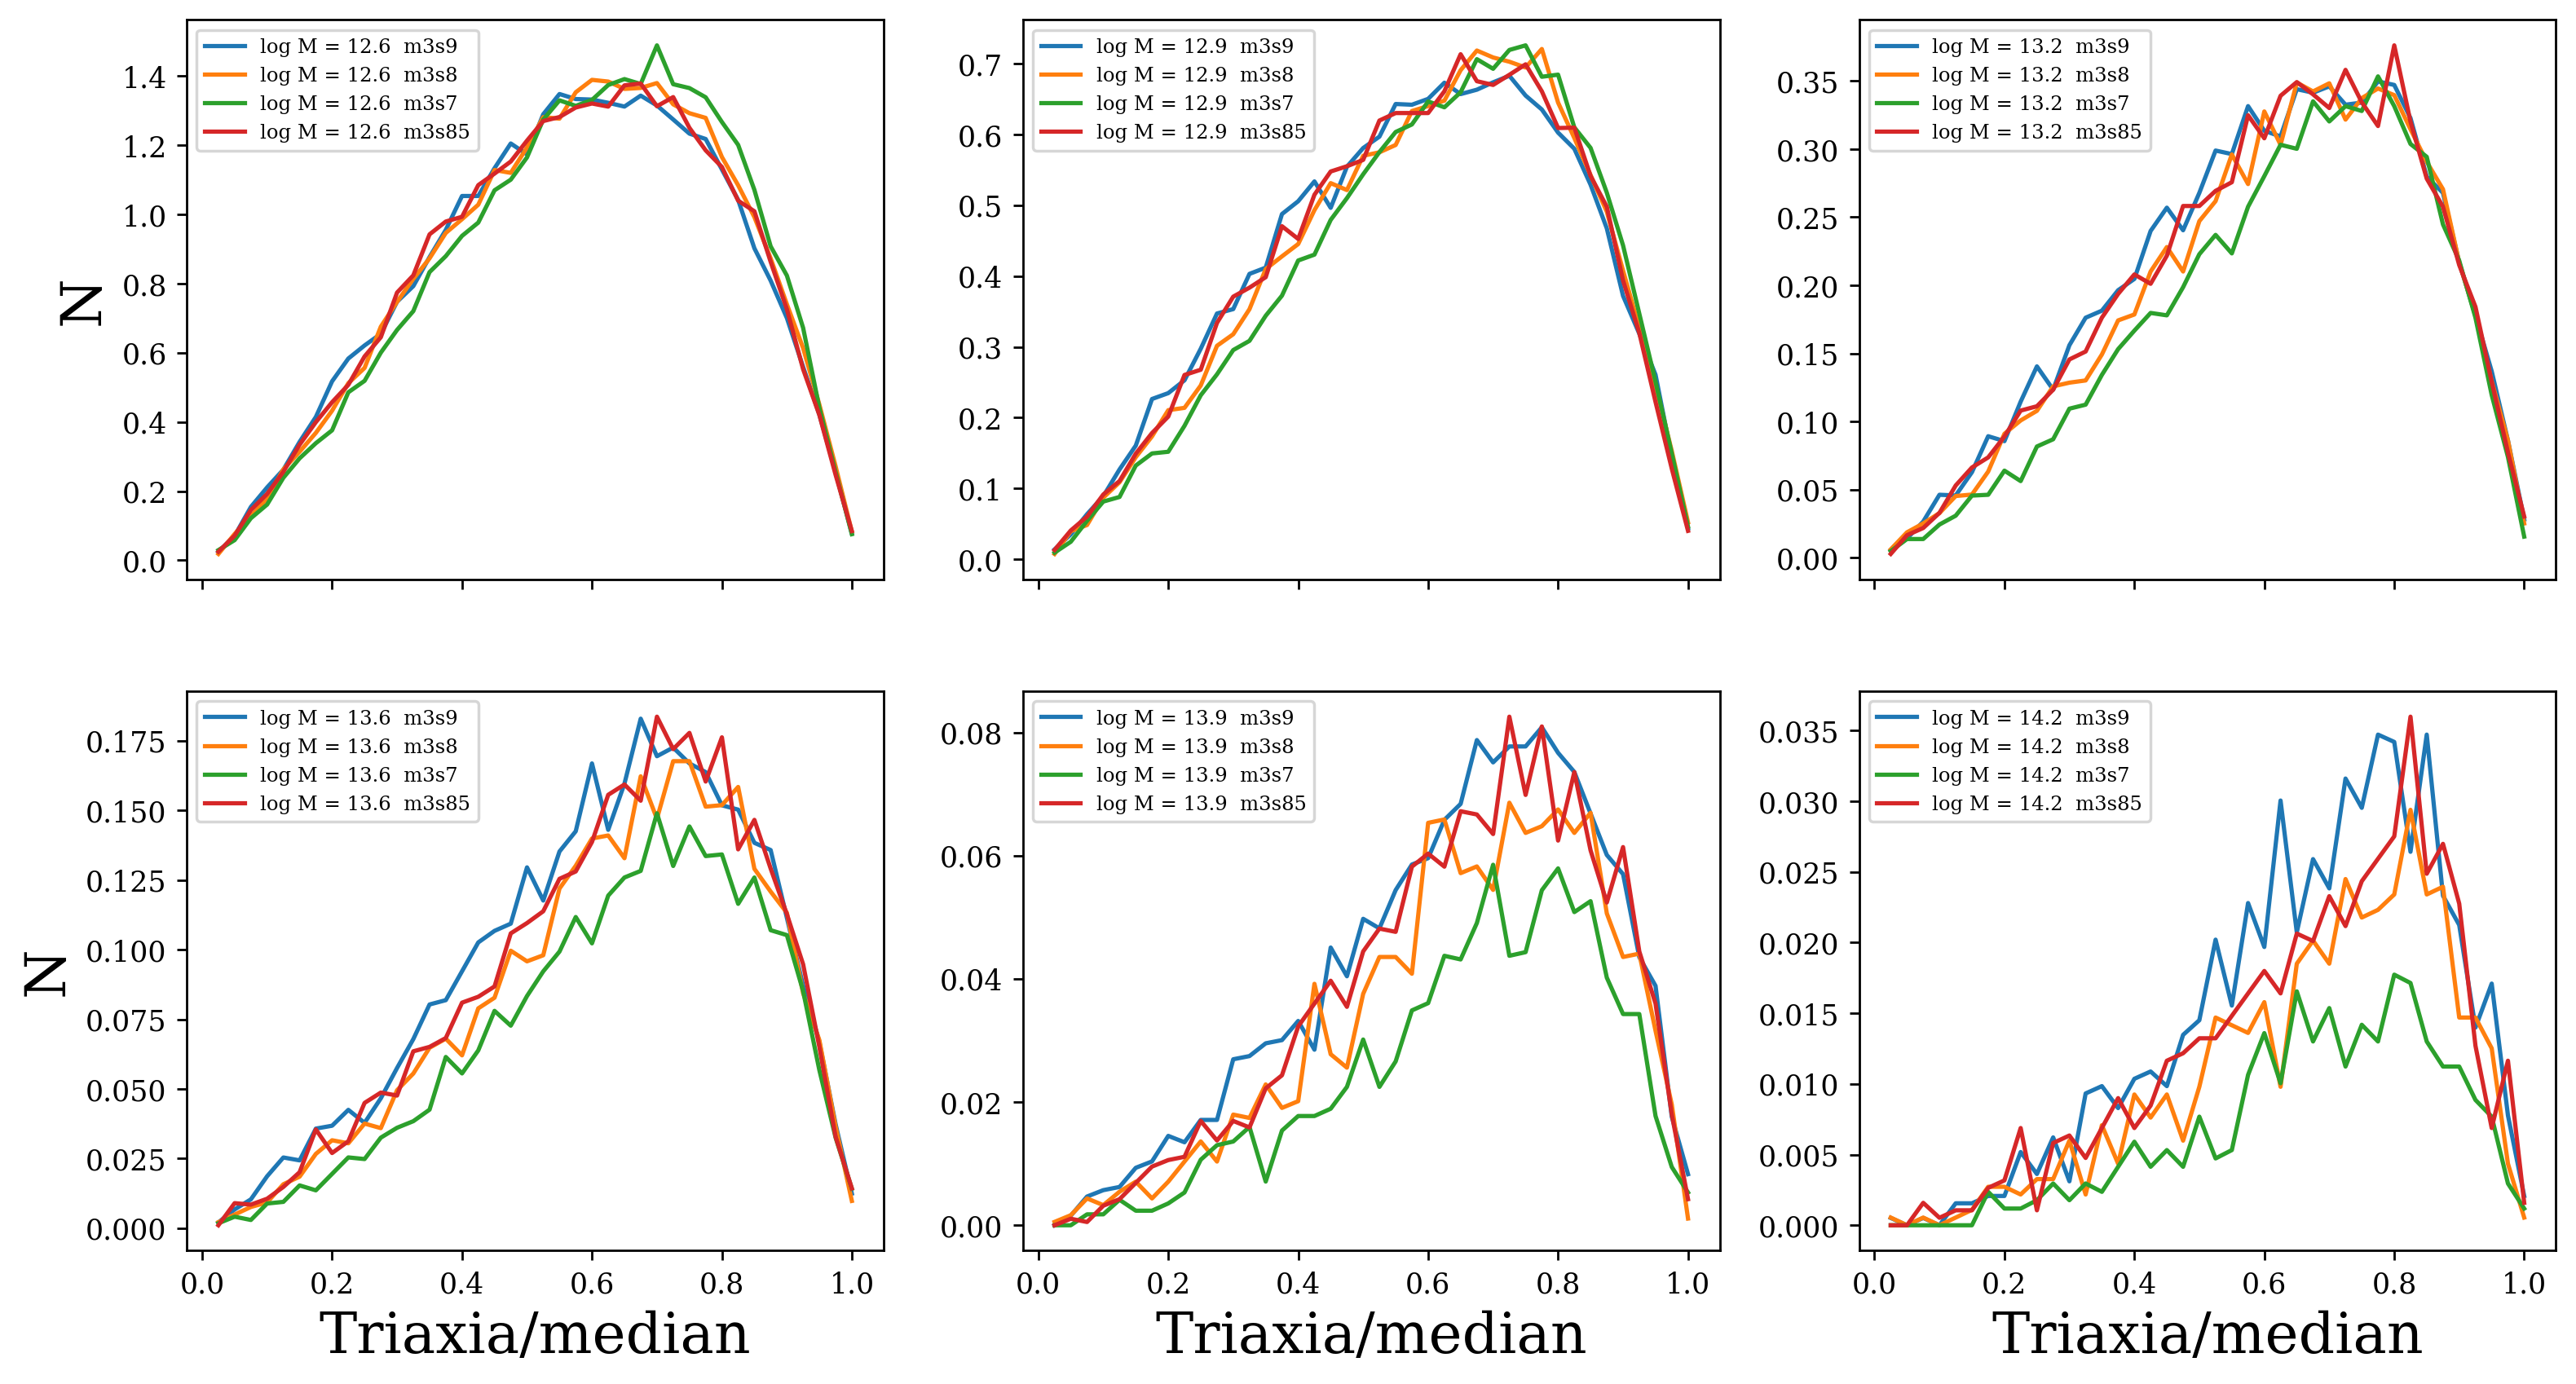

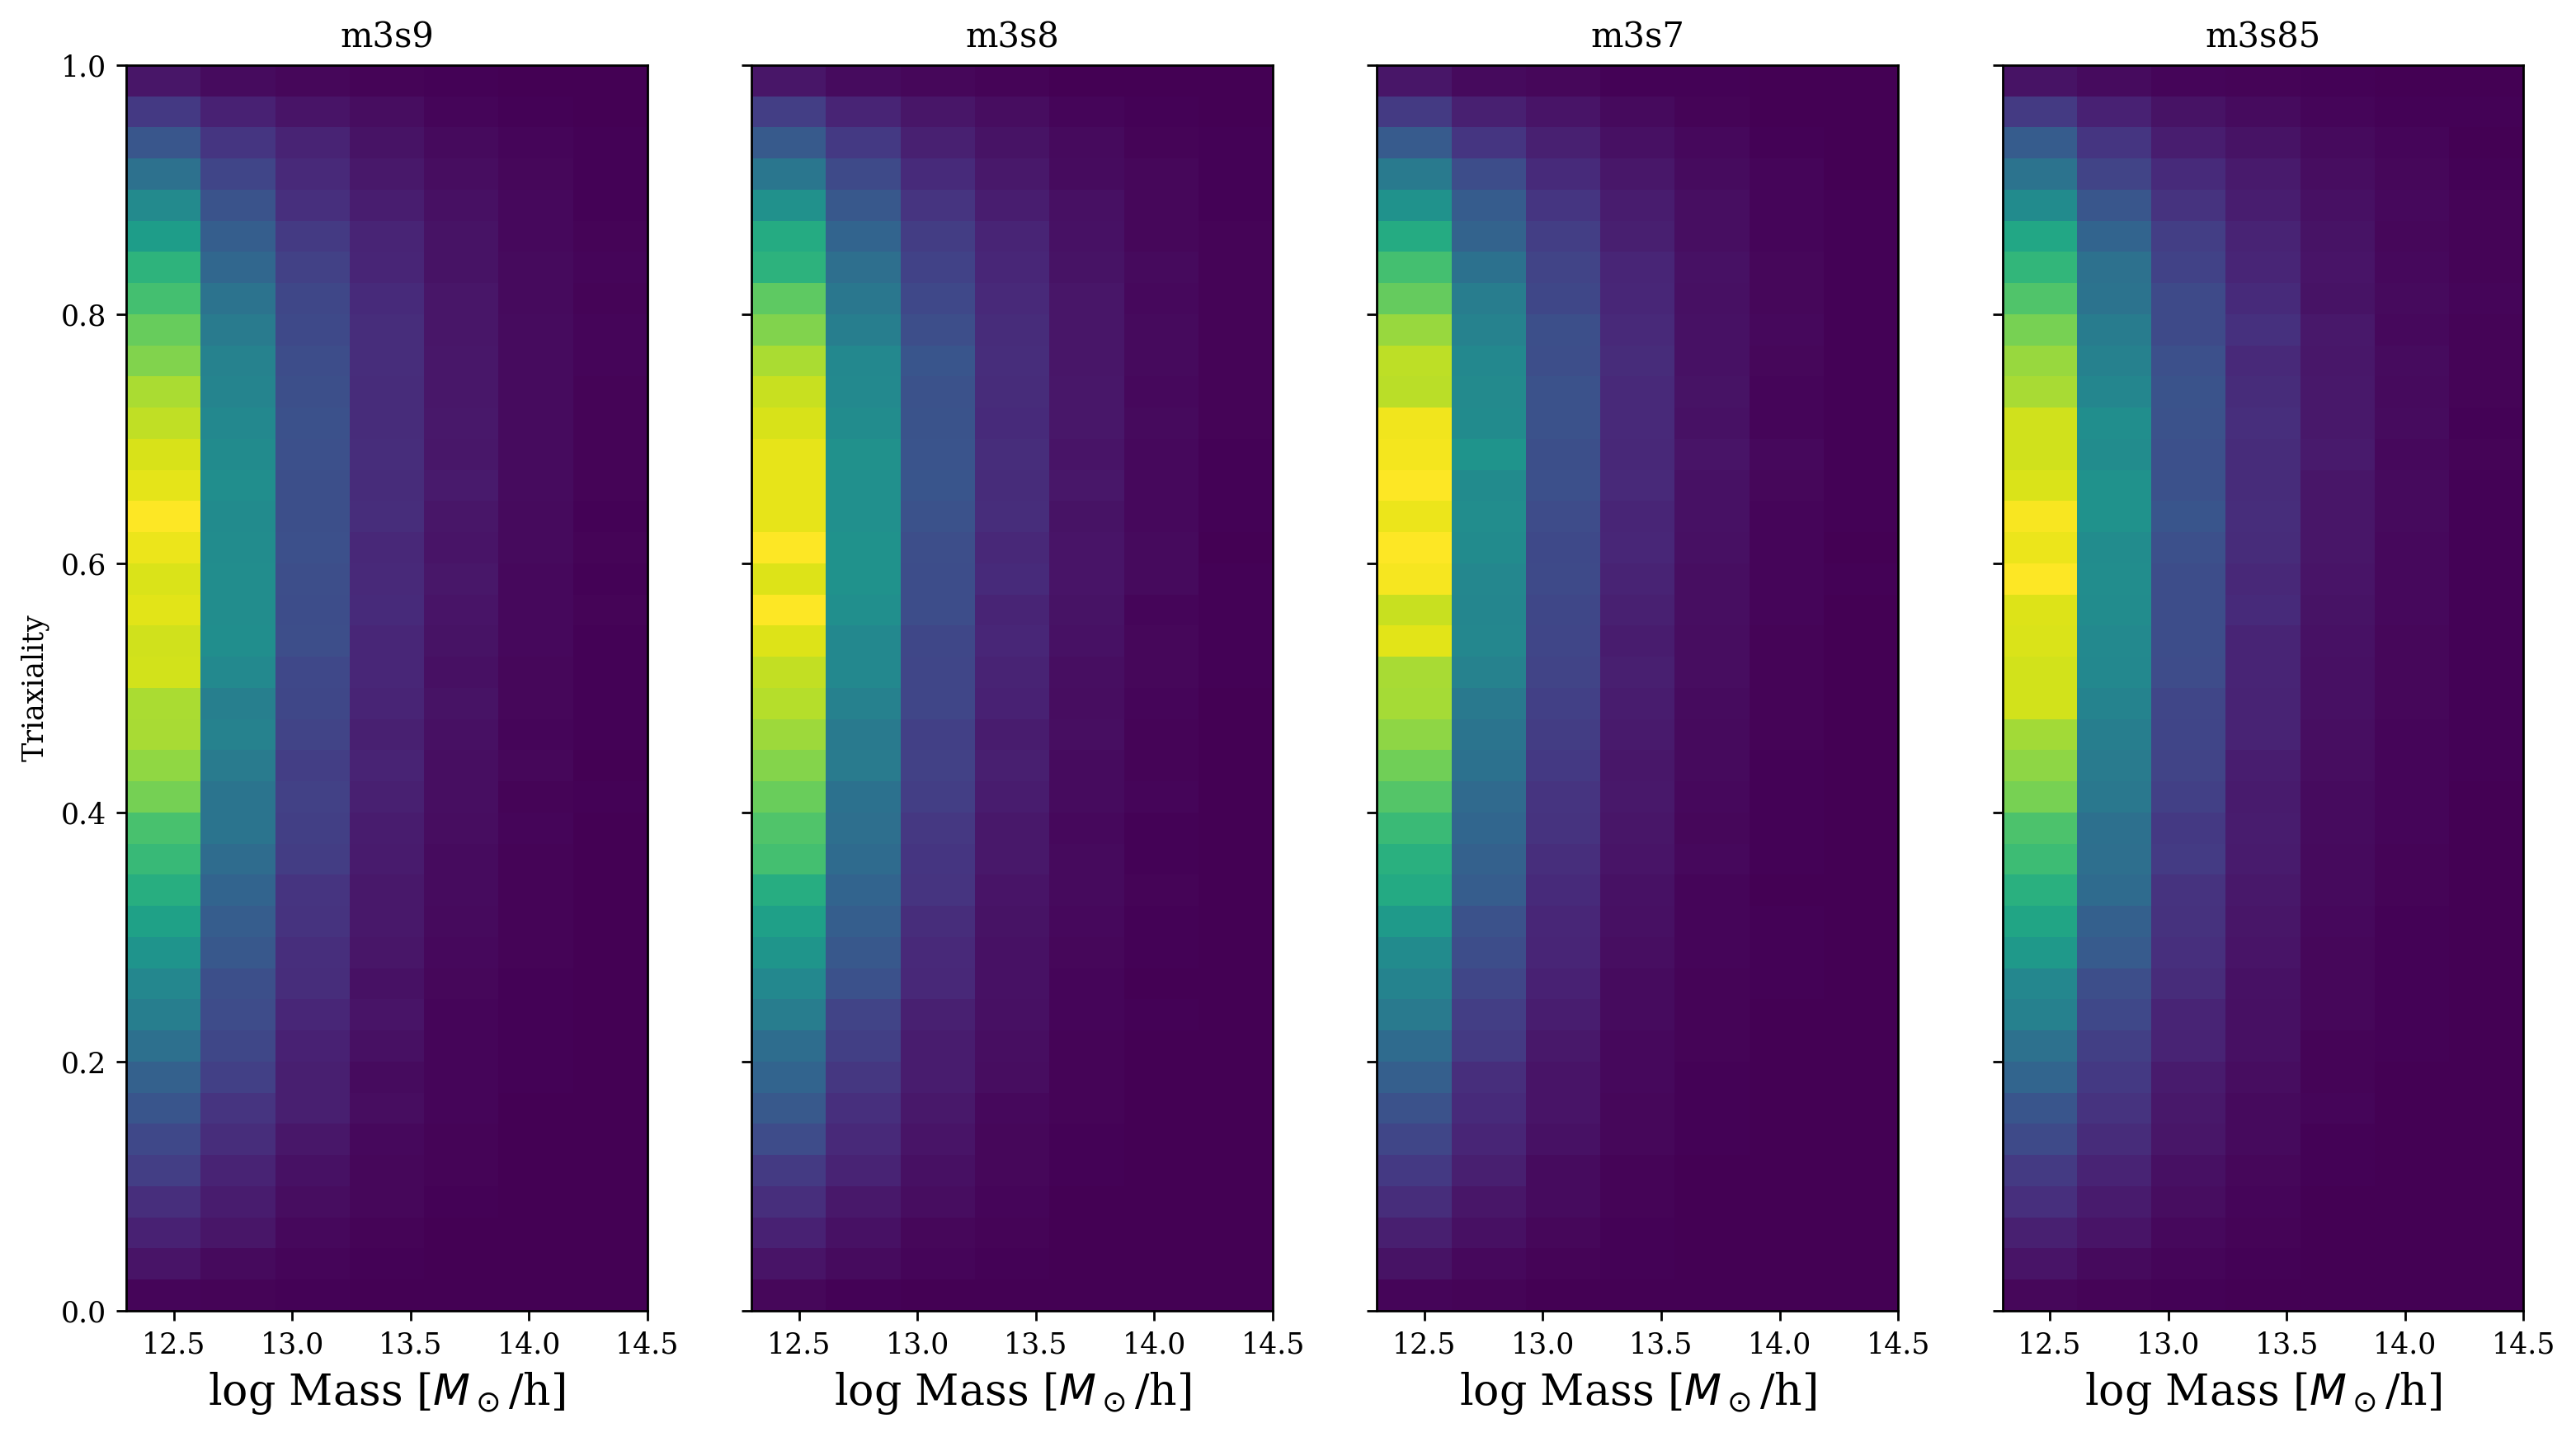

In [17]:
simselec = [-5, -8, -2, -1]
nsims, nbins_m, nbins_c = len(simselec), 40, 7

fig, axs = plt.subplots(2, 3, sharex=True, figsize=[15, 8])
fig2, axs2 = plt.subplots(1, nsims, sharey=True, figsize=[15, 8])
tosave = np.zeros((2,3,nsims,2,nbins_m))
prop = "Triaxiality"
#meds = np.zeros((nsims, nbins_c-1))
for i, s in zip(range(nsims), simselec):
    print(s)
    sim1 = sm.Simulation(sim_names[s], omegas[s], sigmas[s], path)
    
    halos = sim1.read_halos(snapshot=0)
    b = halos['b(25)']
    c = halos['c(26)']
    str_prop =  (1 - b**2)/(1-c**2)
    
    reds = sim1.get_redshifts()
    masses = halos['Mhalo(4)']
    
    min_r, max_r = np.mean(str_prop) - 2*np.std(str_prop), np.mean(str_prop) + 2*np.std(str_prop)
    #h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), conc, cmap = cmp, range=[[np.log10(3*np.min(masses)), 14], [2.3, 14]], bins=80)
    h, xedges, yedges, im  = axs2[i].hist2d(np.log10(masses), str_prop, range=[[12.3, 14.5], [0, 1]], density=True, bins=[nbins_c, nbins_m])

    axs2[i].set_title(sim_names[s])

    axs2[i].set_xlabel(r'log Mass [$M_\odot$/h]', size=15)
    axs2[i].set_ylabel('Triaxiality'[:11*(i==0)])
    for k in range(1, 7):
        cum_hist = np.cumsum(h[k, :])/np.cumsum(h[k, :])[-1]
        med_idx = np.min(np.where(cum_hist>0.5))
        med = yedges[1:][med_idx]
        #meds[i,k-1] = med
        axs[(k-1)//3, (k-1)%3].plot(yedges[1:], h[k, :],  label='log M = {:2.1f}  '.format(xedges[k])+sim_names[s])
        #axs[(k-1)//3, (k-1)%3].plot((yedges[1:]-np.average(meds[i,:]))/np.average(meds[i,:]), cum_hist,  label='log M = {:2.1f}  '.format(xedges[k])+sim_names[s])
        #axs[(k-1)//3, (k-1)%3].set_xlim(-0.3,0.3)
        # axs[(k-1)//3, (k-1)%3].set_ylim(0.4,0.6)
        tosave[(k-1)//3, (k-1)%3, i, :, :] = np.array([yedges[1:], h[k, :]])
        if i == nsims-1:
            axs[(k-1)//3, (k-1)%3].legend()
            if (k-1)%3 == 0:
                axs[(k-1)//3, (k-1)%3].set_ylabel('N', size=20)
            if (k-1)//3 == 1:
                axs[(k-1)//3, (k-1)%3].set_xlabel(prop[:-4]+'/median', size=20)

# COSMOLOGY VS STRUCTURE 

In [5]:
simselecs = [ 'm25s85', 'm3s75', 'm2s8', 'm4s7', 'm4s8', 'm2s9', 'm3s8', 'm35s75', 'm4s9', 'm3s9', 'm25s75', 'm2s1', 'm3s7', 'm3s85', 'm2s7', 'm25s8', 'm35s8', 'm25s9', 'm35s9', 'm35s7', 'm35s85']

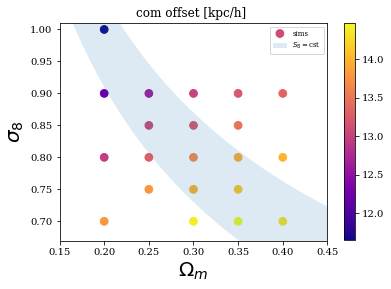

In [8]:
prop = 'com_offset'
#sims = np.arange(14, len(sim_names), 1)
mlim = 1e13

meds, oms, s8s = [], [], []
for i in range(len(simselecs)):
    sim = simselecs[i]
    om0 = sims[sim][0]
    oms .append(om0)
    sig8 = sims[sim][1]
    s8s.append(sig8)
    sim1 = sm.Simulation(sim, om0, sig8, path)
    halos = sim1.read_halos()
    reds = sim1.get_redshifts()
    masses = halos['Mhalo(4)']
    mbin = np.where(masses>mlim)
    prop2d = np.array(sim1.get_2dprop(prop))[mbin]
    #str_prop = np.array(halos[prop])[mbin]
    meds.append(np.median(prop2d)*1000)
plt.figure()
plt.scatter(np.array(oms), np.array(s8s), s=60, c=meds, label='sims', cmap='plasma')
omgs = np.linspace(0.15, 0.55)
sigs = 0.8/np.sqrt(omgs/0.3)
plt.fill_between(omgs, sigs-0.07, sigs+0.07, alpha = 0.15, label=r'$S_8=$cst')
plt.xlim(0.15, 0.45)
plt.ylim(0.67, 1.01) 
#plt.title('{} [Kpc/h]'.format(prop))
plt.title('{} '.format('com offset [kpc/h]'))
plt.xlabel(r'$\Omega_m$', size=20)
plt.ylabel(r'$\sigma_8$', size=20)
plt.colorbar()
plt.legend()
#plt.savefig('./figs/{}_om_s8_{:1.1e}_2d_snap.png'.format(prop, mlim), dpi=500,  facecolor='white', transparent=False, bbox_inches='tight')
#plt.savefig('./figs/{}_om_s8_{:1.1e}_2d_snap0.pdf'.format(prop, mlim), dpi=500,  facecolor='white', transparent=False, bbox_inches='tight')

## Interpolating 

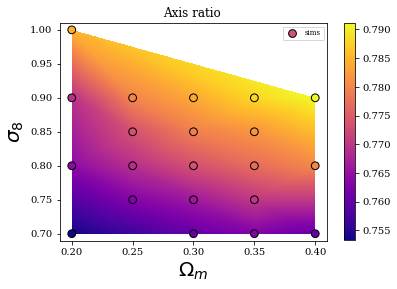

In [45]:
from scipy.interpolate import griddata

prop = 'axis_ratio'
#sims = np.arange(14, len(sim_names), 1)
mlim = 1e13

meds, oms, s8s = [], [], []
for i in range(len(simselecs)):
    sim = simselecs[i]
    om0 = sims[sim][0]
    oms .append(om0)
    sig8 = sims[sim][1]
    s8s.append(sig8)
    sim1 = sm.Simulation(sim, om0, sig8, path)
    halos = sim1.read_halos()
    reds = sim1.get_redshifts()
    masses = halos['Mhalo(4)']
    mbin = np.where(masses>mlim)
    prop2d = np.array(sim1.get_2dprop(prop))[mbin]
    #str_prop = np.array(halos[prop])[mbin]
    meds.append(np.median(prop2d))
plt.figure()

z = np.array(meds) 
x = np.array(oms)
y = np.array(s8s)
xi = np.linspace(np.min(x), np.max(x), 1000)
yi = np.linspace(np.min(y), np.max(y), 1000)
X, Y = np.meshgrid(xi, yi)
Z = griddata((x, y), z, (X, Y), method='linear')
#plt.imshow(Z, interpolation= 'gaussian', origin='lower', cmap='plasma')
plt.pcolormesh(X, Y, Z, cmap='plasma')
plt.scatter(np.array(oms), np.array(s8s), s=60, c=meds, label='sims',edgecolors='k', cmap='plasma')

#plt.colorbar()
# omgs = np.linspace(0.15, 0.55)
# sigs = 0.8/np.sqrt(omgs/0.3)
# plt.fill_between(omgs, sigs-0.07, sigs+0.07, alpha = 1, fc='none', ec='b', label=r'$S_8=$cst')
plt.xlim(0.19, 0.41)
plt.ylim(0.69, 1.01) 
#plt.title('{} [Kpc/h]'.format(prop))
#plt.title('{} '.format('com offset [kpc/h]'))
#plt.title('{} '.format('Concentration'))
plt.title('{} '.format('Axis ratio'))
plt.xlabel(r'$\Omega_m$', size=20)
plt.ylabel(r'$\sigma_8$', size=20)
plt.colorbar()
plt.legend()
plt.savefig('./figs/interp_{}_om_s8_{:1.1e}_2d_snap.png'.format(prop, mlim), dpi=500,  facecolor='white', transparent=False, bbox_inches='tight')
plt.savefig('./figs/interp_{}_om_s8_{:1.1e}_2d_snap0.pdf'.format(prop, mlim), dpi=500,  facecolor='white', transparent=False, bbox_inches='tight')

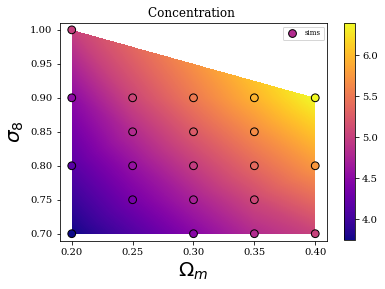

In [44]:
plt.figure()

z = np.array(meds) 
x = np.array(oms)
y = np.array(s8s)
xi = np.linspace(np.min(x), np.max(x), 1000)
yi = np.linspace(np.min(y), np.max(y), 1000)
X, Y = np.meshgrid(xi, yi)
Z = griddata((x, y), z, (X, Y), method='linear')
plt.pcolormesh(X, Y, Z, cmap='plasma')

#plt.imshow(Z, interpolation= 'gaussian', origin='lower', cmap='plasma')

plt.scatter(np.array(oms), np.array(s8s), s=60, c=meds, label='sims',edgecolors='k', cmap='plasma')

#plt.colorbar()
# omgs = np.linspace(0.15, 0.55)
# sigs = 0.8/np.sqrt(omgs/0.3)
# plt.fill_between(omgs, sigs-0.07, sigs+0.07, alpha = 1, fc='none', ec='b', label=r'$S_8=$cst')
plt.xlim(0.19, 0.41)
plt.ylim(0.69, 1.01) 
#plt.title('{} [Kpc/h]'.format(prop))
#plt.title('{} '.format('com offset [kpc/h]'))
plt.title('{} '.format('Concentration'))
plt.xlabel(r'$\Omega_m$', size=20)
plt.ylabel(r'$\sigma_8$', size=20)
plt.colorbar()
plt.legend()
plt.savefig('./figs/interp_{}_om_s8_{:1.1e}_2d_snap.png'.format(prop, mlim), dpi=500,  facecolor='white', transparent=False, bbox_inches='tight')
plt.savefig('./figs/interp_{}_om_s8_{:1.1e}_2d_snap0.pdf'.format(prop, mlim), dpi=500,  facecolor='white', transparent=False, bbox_inches='tight')

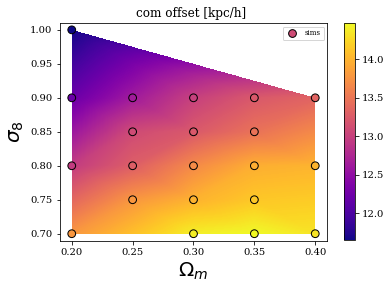

In [41]:
plt.figure()

z = np.array(meds) 
x = np.array(oms)
y = np.array(s8s)
xi = np.linspace(np.min(x), np.max(x), 1000)
yi = np.linspace(np.min(y), np.max(y), 1000)
X, Y = np.meshgrid(xi, yi)
Z = griddata((x, y), z, (X, Y), method='linear')
#plt.imshow(Z, interpolation= 'gaussian', origin='lower', cmap='plasma')
plt.pcolormesh(X, Y, Z, cmap='plasma')
plt.scatter(np.array(oms), np.array(s8s), s=60, c=meds, label='sims',edgecolors='k', cmap='plasma')

#plt.colorbar()
# omgs = np.linspace(0.15, 0.55)
# sigs = 0.8/np.sqrt(omgs/0.3)
# plt.fill_between(omgs, sigs-0.07, sigs+0.07, alpha = 1, fc='none', ec='b', label=r'$S_8=$cst')
plt.xlim(0.19, 0.41)
plt.ylim(0.69, 1.01) 
#plt.title('{} [Kpc/h]'.format(prop))
plt.title('{} '.format('com offset [kpc/h]'))
plt.xlabel(r'$\Omega_m$', size=20)
plt.ylabel(r'$\sigma_8$', size=20)
plt.colorbar()
plt.legend()

plt.savefig('./figs/interp_{}_om_s8_{:1.1e}_2d_snap.png'.format(prop, mlim), dpi=500,  facecolor='white', transparent=False, bbox_inches='tight')
plt.savefig('./figs/interp_{}_om_s8_{:1.1e}_2d_snap0.pdf'.format(prop, mlim), dpi=500,  facecolor='white', transparent=False, bbox_inches='tight')

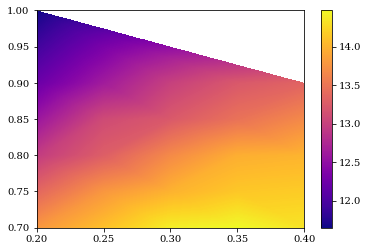

In [9]:
sim = 'm4s9'
sim1 = sm.Simulation(sim, om0, sig8, path)
prop2d = np.array(sim1.get_2dprop(prop))

In [10]:
prop2d[0]

array([5.41025322e-11, 2.92480445e-02])

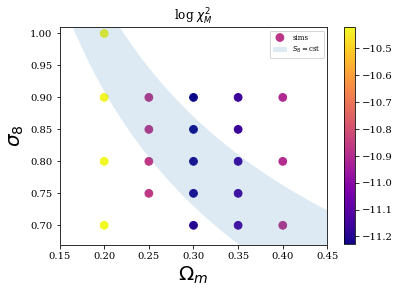

In [21]:
prop = r'$\chi^2_M$'
#sims = np.arange(14, len(sim_names), 1)
mlim = 1e13

meds, oms, s8s = [], [], []
for i in range(len(simselecs)):
    sim = simselecs[i]
    om0 = sims[sim][0]
    oms.append(om0)
    sig8 = sims[sim][1]
    s8s.append(sig8)
    sim1 = sm.Simulation(sim, om0, sig8, path)
    halos = sim1.read_halos()
    reds = sim1.get_redshifts()
    masses = halos['Mhalo(4)']
    mbin = np.where(masses>mlim)
    prop2d = np.array(sim1.get_2dprop(prop))[mbin]
    #str_prop = np.array(halos[prop])[mbin]
    #meds.append(np.median(prop2d[np.isfinite(prop2d[:,1]),1]))
    meds.append(np.median(np.log10(prop2d[:,0])))
plt.figure()
plt.scatter(np.array(oms), np.array(s8s), s=60, c=meds, label='sims', cmap='plasma')
omgs = np.linspace(0.15, 0.55)
sigs = 0.8/np.sqrt(omgs/0.3)
plt.fill_between(omgs, sigs-0.07, sigs+0.07, alpha = 0.15, label=r'$S_8=$cst')
plt.xlim(0.15, 0.45)
plt.ylim(0.67, 1.01) 
#plt.title('{} [Kpc/h]'.format(prop))
plt.title('log {} '.format(prop))
plt.xlabel(r'$\Omega_m$', size=20)
plt.ylabel(r'$\sigma_8$', size=20)
plt.colorbar()
plt.legend()
plt.savefig('./figs/{}_om_s8_{:1.1e}_2d_snap.png'.format(prop, mlim), dpi=500,  facecolor='white', transparent=False, bbox_inches='tight')
plt.savefig('./figs/{}_om_s8_{:1.1e}_2d_snap.pdf'.format(prop, mlim), dpi=500,  facecolor='white', transparent=False, bbox_inches='tight')

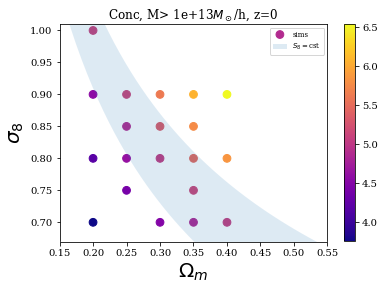

In [32]:
meds.append(np.log10(np.median(prop2d)))
plt.figure()
plt.scatter(np.array(oms), np.array(s8s), s=60, c=meds, label='sims', cmap='plasma')
omgs = np.linspace(0.15, 0.55)
sigs = 0.8/np.sqrt(omgs/0.3)
plt.fill_between(omgs, sigs-0.07, sigs+0.07, alpha = 0.15, label=r'$S_8=$cst')
plt.xlim(0.15, 0.55)
plt.ylim(0.67, 1.01) 
plt.title('log {} [Mpc]'.format(prop))
plt.xlabel(r'$\Omega_m$', size=20)
plt.ylabel(r'$\sigma_8$', size=20)
plt.colorbar()
plt.legend()
plt.savefig('./figs/{}_om_s8_{:1.1e}_2d_snap.png'.format(prop, mlim), dpi=500,  facecolor='white', transparent=False, bbox_inches='tight')
plt.savefig('./figs/{}_om_s8_{:1.1e}_2d_snap0.pdf'.format(prop, mlim), dpi=500,  facecolor='white', transparent=False, bbox_inches='tight')

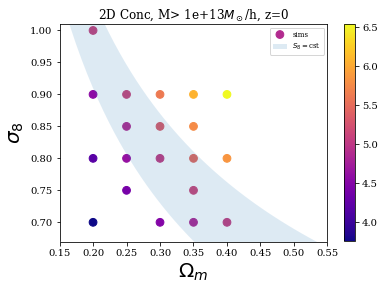

In [30]:
plt.figure()
plt.scatter(np.array(oms), np.array(s8s), s=60, c=meds, label='sims', cmap='plasma')
omgs = np.linspace(0.15, 0.55)
sigs = 0.8/np.sqrt(omgs/0.3)
plt.fill_between(omgs, sigs-0.07, sigs+0.07, alpha = 0.15, label=r'$S_8=$cst')
plt.xlim(0.15, 0.55)
plt.ylim(0.67, 1.01) 
plt.title('2D {}, M> {:1.0e}$M_\odot$/h, z=0'.format(prop, mlim))
plt.xlabel(r'$\Omega_m$', size=20)
plt.ylabel(r'$\sigma_8$', size=20)
plt.colorbar()
plt.legend()
plt.savefig('./figs/{}_om_s8_{:1.1e}_2d_snap0.png'.format(prop, mlim), dpi=500,  facecolor='white', transparent=False, bbox_inches='tight')

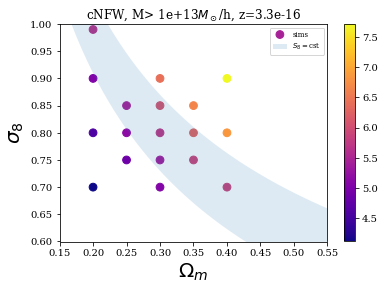

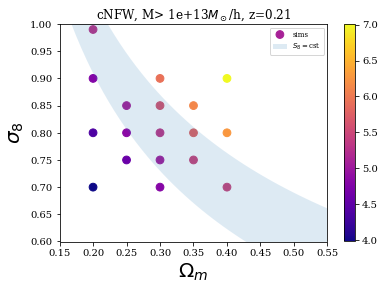

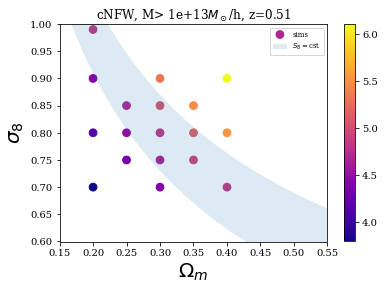

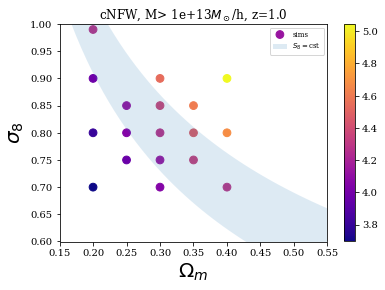

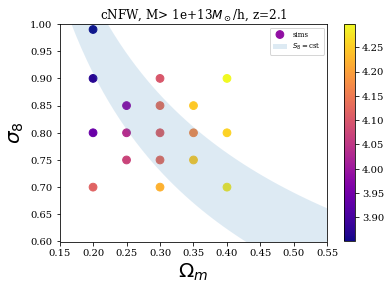

In [26]:
prop = 'cNFW(43)'
sims = np.arange(14, len(sim_names), 1)
mlim = 1e13
for j in range(0, 100, 20):
    meds = []
    for i in sims: 
        sim1 = sm.Simulation(sim_names[i], omegas[i], sigmas[i], path)
        halos = sim1.read_halos(snapshot=j)
        reds = sim1.get_redshifts()
        masses = halos['Mhalo(4)']
        mbin = np.where((masses>mlim)*(masses<5*mlim))
        str_prop = np.array(halos[prop])[mbin]
        meds.append(np.median(str_prop))
    plt.figure()
    plt.scatter(np.array(omegas)[sims], np.array(sigmas)[sims], s=60, c=meds, label='sims', cmap='plasma')
    oms = np.linspace(0.15, 0.55)
    sigs = 0.8/np.sqrt(oms/0.3)
    plt.fill_between(oms, sigs-0.07, sigs+0.07, alpha = 0.15, label=r'$S_8=$cst')
    plt.xlim(0.15, 0.55)
    plt.ylim(0.6, 1) 
    plt.title('{}, M> {:1.0e}$M_\odot$/h, z={:1.2}'.format(prop[:-4], mlim, reds[j]))
    plt.xlabel(r'$\Omega_m$', size=20)
    plt.ylabel(r'$\sigma_8$', size=20)
    plt.colorbar()
    plt.legend()
    plt.savefig('{}_om_s8_{:1.1e}_snap{}.png'.format(prop[:-4],mlim, j), dpi=500,  facecolor='white', transparent=False, bbox_inches='tight')

In [27]:
halos.keys()

Index(['#ID(1)', 'hostHalo(2)', 'numSubStruct(3)', 'Mhalo(4)', 'npart(5)',
       'Xc(6)', 'Yc(7)', 'Zc(8)', 'VXc(9)', 'VYc(10)', 'VZc(11)', 'Rhalo(12)',
       'Rmax(13)', 'r2(14)', 'mbp_offset(15)', 'com_offset(16)', 'Vmax(17)',
       'v_esc(18)', 'sigV(19)', 'lambda(20)', 'lambdaE(21)', 'Lx(22)',
       'Ly(23)', 'Lz(24)', 'b(25)', 'c(26)', 'Eax(27)', 'Eay(28)', 'Eaz(29)',
       'Ebx(30)', 'Eby(31)', 'Ebz(32)', 'Ecx(33)', 'Ecy(34)', 'Ecz(35)',
       'ovdens(36)', 'nbins(37)', 'fMhires(38)', 'Ekin(39)', 'Epot(40)',
       'SurfP(41)', 'Phi0(42)', 'cNFW(43)'],
      dtype='object')

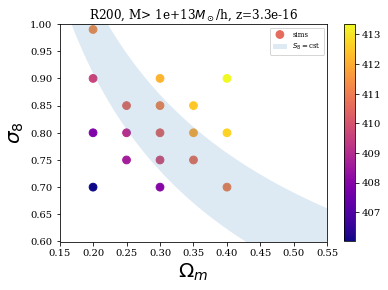

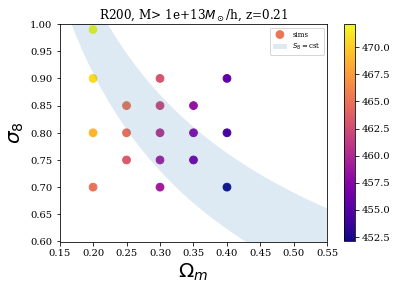

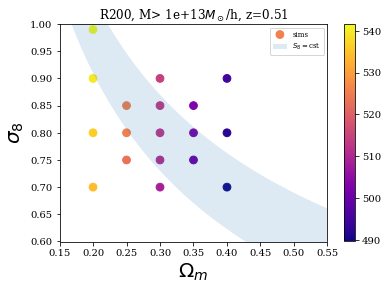

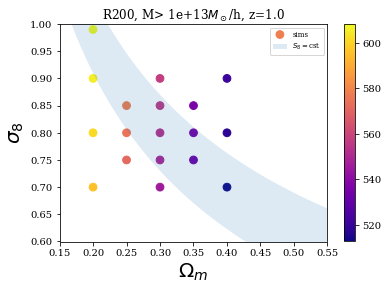

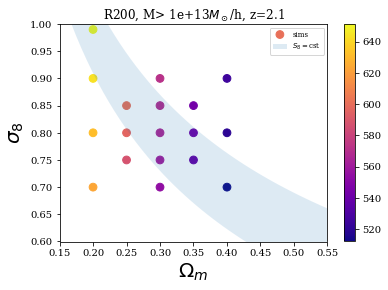

In [29]:
prop = 'cNFW(43)'
sims = np.arange(14, len(sim_names), 1)
mlim = 1e13
for j in range(0, 100, 20):
    meds = []
    for i in sims: 
        sim1 = sm.Simulation(sim_names[i], omegas[i], sigmas[i], path)
        halos = sim1.read_halos(snapshot=j)
        reds = sim1.get_redshifts()
        masses = halos['Mhalo(4)']
        mbin = np.where((masses>mlim)*(masses<5*mlim))
        #str_prop = np.array(halos[prop])[mbin]
        str_prop = np.array(halos['Rhalo(12)'])[mbin]
        meds.append(np.median(str_prop))
    plt.figure()
    plt.scatter(np.array(omegas)[sims], np.array(sigmas)[sims], s=60, c=meds, label='sims', cmap='plasma')
    oms = np.linspace(0.15, 0.55)
    sigs = 0.8/np.sqrt(oms/0.3)
    plt.fill_between(oms, sigs-0.07, sigs+0.07, alpha = 0.15, label=r'$S_8=$cst')
    plt.xlim(0.15, 0.55)
    plt.ylim(0.6, 1) 
    plt.title('{}, M> {:1.0e}$M_\odot$/h, z={:1.2}'.format('R200', mlim, reds[j]))
    plt.xlabel(r'$\Omega_m$', size=20)
    plt.ylabel(r'$\sigma_8$', size=20)
    plt.colorbar()
    plt.legend()
    plt.savefig('rvir_om_s8_{:1.1e}_snap{}.png'.format(mlim, j), dpi=500,  facecolor='white', transparent=False, bbox_inches='tight')

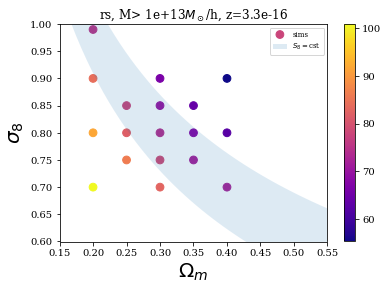

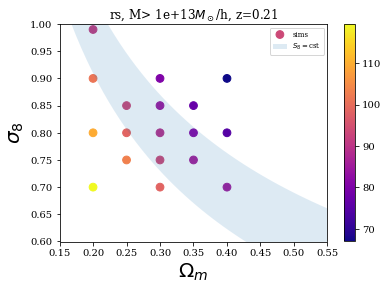

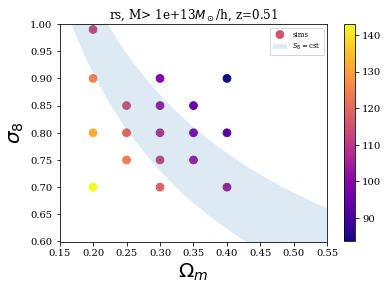

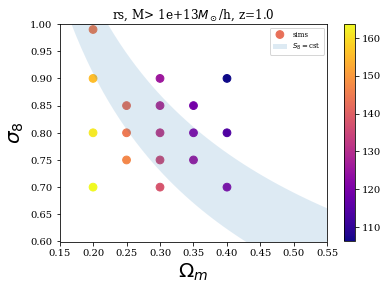

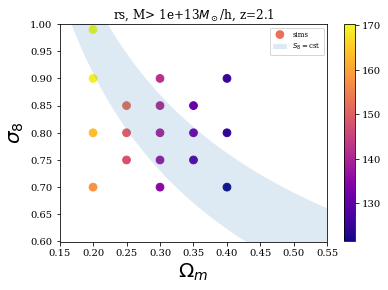

In [30]:
prop = 'cNFW(43)'
sims = np.arange(14, len(sim_names), 1)
mlim = 1e13
for j in range(0, 100, 20):
    meds = []
    for i in sims: 
        sim1 = sm.Simulation(sim_names[i], omegas[i], sigmas[i], path)
        halos = sim1.read_halos(snapshot=j)
        reds = sim1.get_redshifts()
        masses = halos['Mhalo(4)']
        mbin = np.where((masses>mlim)*(masses<5*mlim))
        str_prop1 = np.array(halos[prop])[mbin]
        str_prop2 = np.array(halos['Rhalo(12)'])[mbin]
        str_prop = str_prop2/str_prop1
        meds.append(np.median(str_prop))
    plt.figure()
    plt.scatter(np.array(omegas)[sims], np.array(sigmas)[sims], s=60, c=meds, label='sims', cmap='plasma')
    oms = np.linspace(0.15, 0.55)
    sigs = 0.8/np.sqrt(oms/0.3)
    plt.fill_between(oms, sigs-0.07, sigs+0.07, alpha = 0.15, label=r'$S_8=$cst')
    plt.xlim(0.15, 0.55)
    plt.ylim(0.6, 1) 
    plt.title('{}, M> {:1.0e}$M_\odot$/h, z={:1.2}'.format('rs', mlim, reds[j]))
    plt.xlabel(r'$\Omega_m$', size=20)
    plt.ylabel(r'$\sigma_8$', size=20)
    plt.colorbar()
    plt.legend()
    plt.savefig('rs_om_s8_{:1.1e}_snap{}.png'.format(mlim, j), dpi=500,  facecolor='white', transparent=False, bbox_inches='tight')

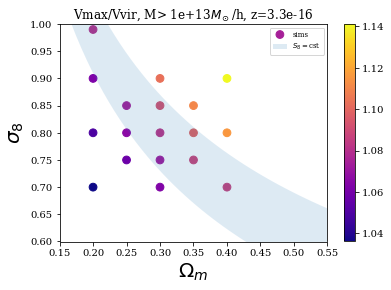

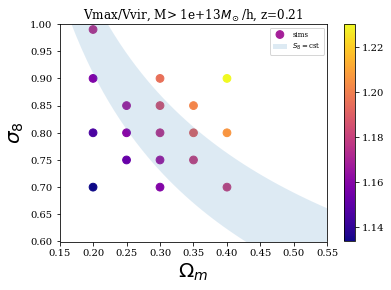

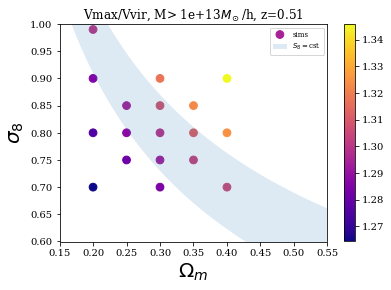

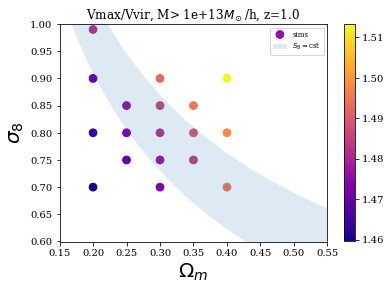

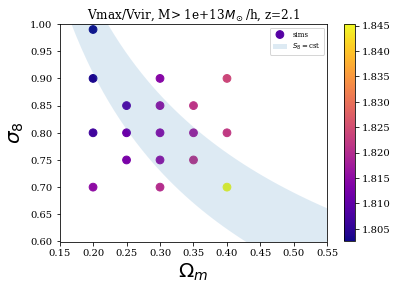

In [35]:
#prop = 'cNFW(43)'
sims = np.arange(14, len(sim_names), 1)
mlim = 1e13
for j in range(0, 100, 20):
    meds = []
    for i in sims: 
        sim1 = sm.Simulation(sim_names[i], omegas[i], sigmas[i], path)
        halos = sim1.read_halos(snapshot=j)
        reds = sim1.get_redshifts()
        masses = np.array(halos['Mhalo(4)'])
        mbin = np.where((masses>mlim)*(masses<5*mlim))
        M = masses[mbin]
        str_prop1 = np.array(halos['Vmax(17)'])[mbin]
        str_prop2 = np.sqrt(1000*cp.G*M/np.array(halos['Rhalo(12)'])[mbin])
        str_prop = str_prop1/str_prop2
        meds.append(np.median(str_prop))
    plt.figure()
    plt.scatter(np.array(omegas)[sims], np.array(sigmas)[sims], s=60, c=meds, label='sims', cmap='plasma')
    oms = np.linspace(0.15, 0.55)
    sigs = 0.8/np.sqrt(oms/0.3)
    plt.fill_between(oms, sigs-0.07, sigs+0.07, alpha = 0.15, label=r'$S_8=$cst')
    plt.xlim(0.15, 0.55)
    plt.ylim(0.6, 1) 
    plt.title('Vmax/Vvir, M> {:1.0e}$M_\odot$/h, z={:1.2}'.format(mlim, reds[j]))
    plt.xlabel(r'$\Omega_m$', size=20)
    plt.ylabel(r'$\sigma_8$', size=20)
    plt.colorbar()
    plt.legend()
    plt.savefig('Vmax_Vvir_om_s8_{:1.1e}_snap{}.png'.format(mlim, j), dpi=500,  facecolor='white', transparent=False, bbox_inches='tight')

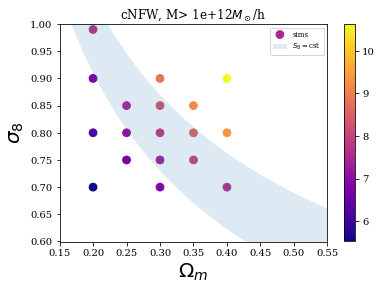

In [19]:
plt.scatter(np.array(omegas)[sims], np.array(sigmas)[sims], s=60, c=meds, label='sims', cmap='plasma')
oms = np.linspace(0.15, 0.55)
sigs = 0.8/np.sqrt(oms/0.3)
plt.fill_between(oms, sigs-0.07, sigs+0.07, alpha = 0.15, label=r'$S_8=$cst')
plt.xlim(0.15, 0.55)
plt.ylim(0.6, 1) 
plt.title('{}, M> {:1.0e}$M_\odot$/h'.format(prop[:-4], mlim))
plt.xlabel(r'$\Omega_m$', size=20)
plt.ylabel(r'$\sigma_8$', size=20)
plt.colorbar()
plt.legend()
plt.savefig('{}_om_s8_{:1.1e}.png'.format(prop[:-4],mlim), dpi=500,  facecolor='white', transparent=False, bbox_inches='tight')

/tmp/ipykernel_9003/412146960.py:11: RuntimeWarning: divide by zero encountered in log10
  X = np.log10(np.array(vals)[:,np.newaxis])
/home/painchess/.local/lib/python3.11/site-packages/numpy/core/function_base.py:157: RuntimeWarning: invalid value encountered in multiply
  y *= step
/home/painchess/.local/lib/python3.11/site-packages/numpy/core/function_base.py:167: RuntimeWarning: invalid value encountered in add
  y += start


ValueError: Input X contains infinity or a value too large for dtype('float64').

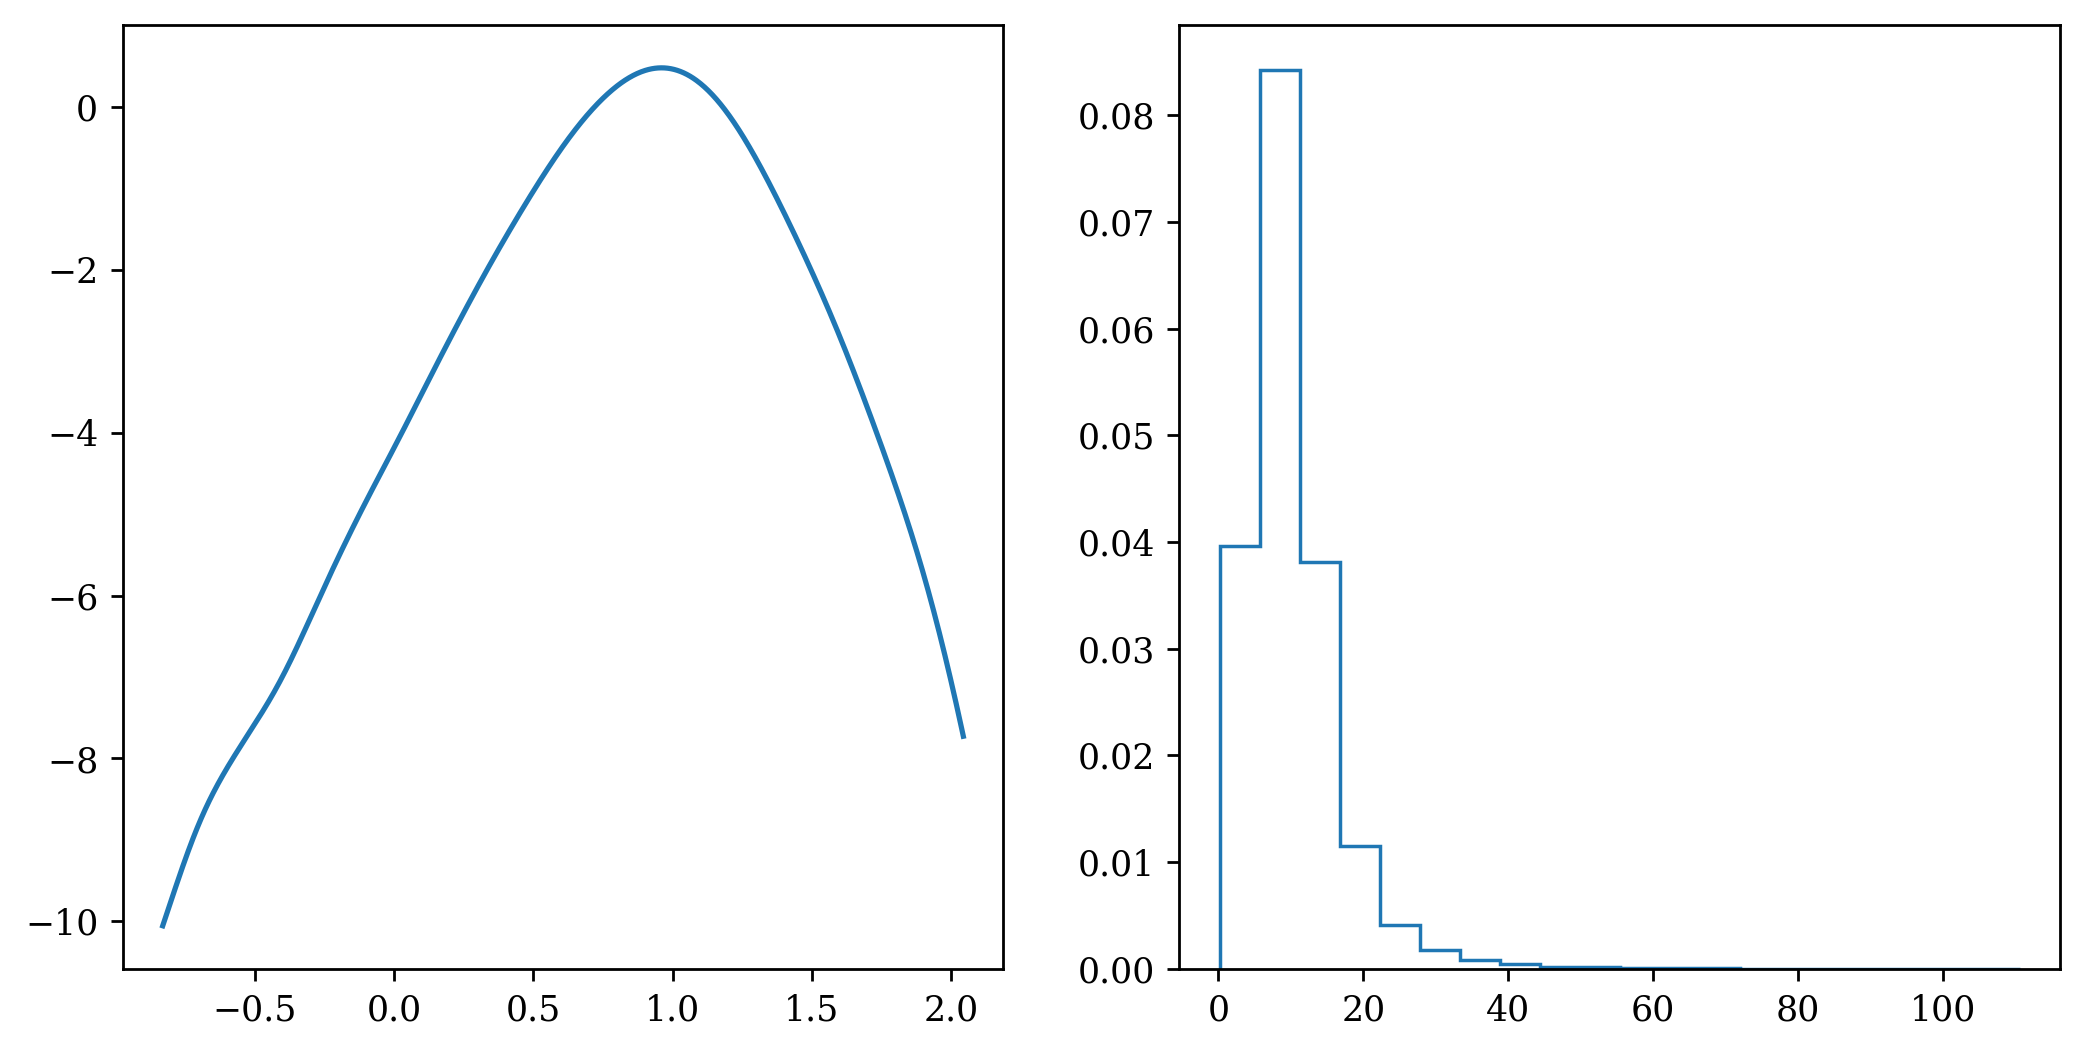

In [36]:
prop = 'com_offset(16)'
knl = "gaussian"
sim_selec = ['m2s9', 'm4s7', 'm2s7', 'm4s9']
mmins = []
mmin, mmax = 1e12, 5e12
fig, axs = plt.subplots(1,2, figsize=[10,5])
for sim in sim_selec:
    sim1 = sm.Simulation(sim, sims[sim][0], sims[sim][1], path)
    halos = sim1.read_halos(snapshot=0)
    vals = halos[prop][(mmin<halos['Mhalo(4)'])*(mmax>halos['Mhalo(4)'])]
    X = np.log10(np.array(vals)[:,np.newaxis])
    xmin, xmax = np.min(X), np.max(X)
    xplot = np.linspace(xmin, xmax, 1000)[:, np.newaxis]
    kde = KernelDensity(kernel=knl, bandwidth=np.median(X)/10).fit(X)
    axs[0].plot(xplot, kde.score_samples(xplot))
    axs[1].hist(vals, bins=20, density=True, histtype='step', log=False, label=sim)
axs[0].set_xlabel(prop[:-4], size=20)
axs[1].set_xlabel(prop[:-4], size=20)
axs[1].set_ylabel('N', size=20)
axs[0].set_ylabel('log L', size=20)
plt.legend()
fig.suptitle('M = {:1.2e}'.format(mmin), size=20)
plt.savefig('./figs/distrib_{}_{:1.2e}.png'.format(prop[:-4], mmin), bbox_inches='tight', dpi=150, facecolor='white', transparent=False)
plt.savefig('./figs/distrib_{}_{:1.2e}.pdf'.format(prop[:-4], mmin), bbox_inches='tight', dpi=150, facecolor='white', transparent=False)

In [28]:
prop = 'com_offset(16)'
#sim1 = Simulation(sim_names[i], omegas[i], sigmas[i], path)
halos = sim1.read_halos(snapshot=0)


(0.0, 50.0)

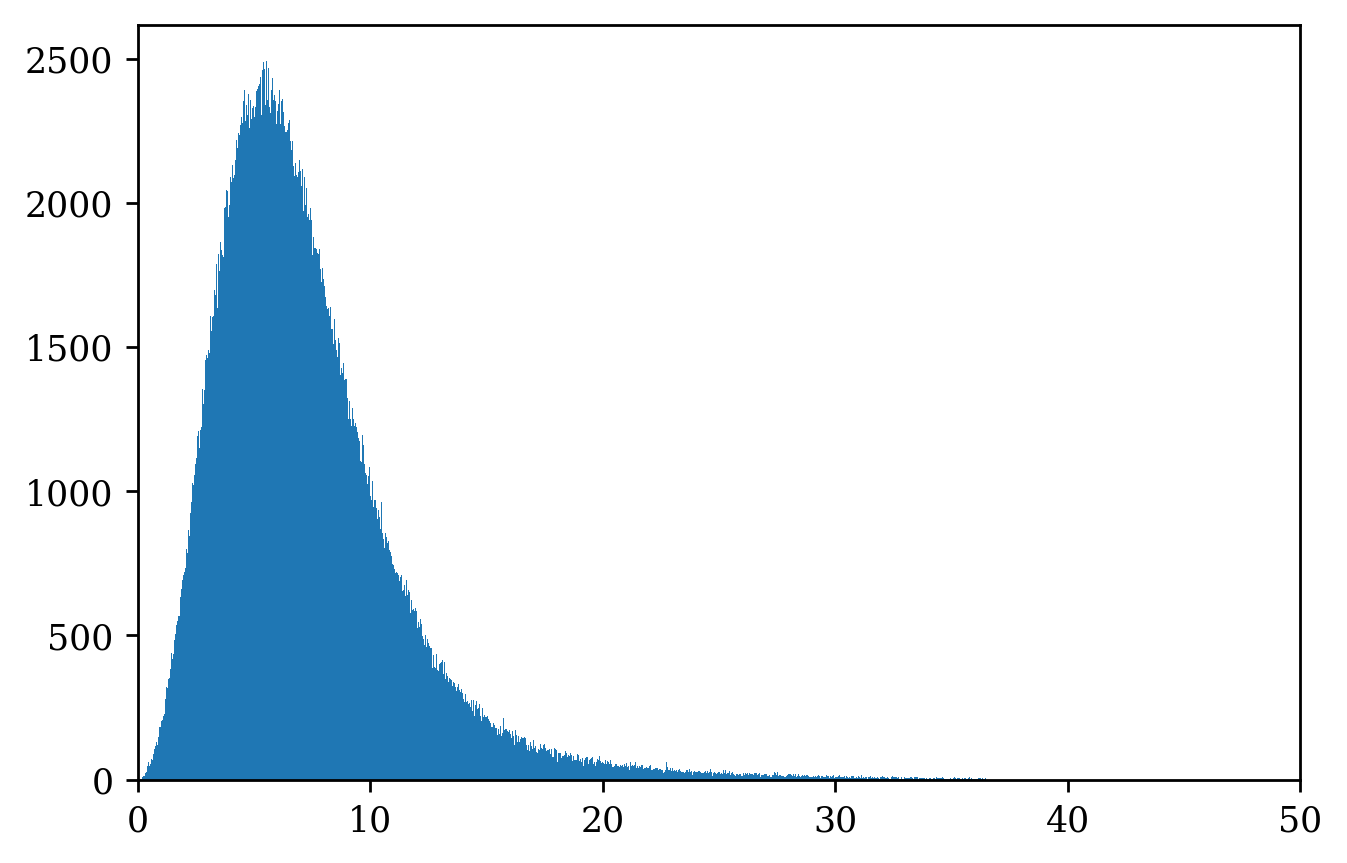

In [29]:
h = plt.hist(halos[prop], bins=1000)
plt.xlim(0, 50)